# 用户基本信息表特征探索和提取
* 从原始数据提取表格
* 画出特征的柱状图分布
* 验证奇异值

In [1]:
from preporcess import CleanerAnny
from __init__ import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Using cmappertools v1.0.24.


In [41]:
def dfBuilder(kw):
    cleaner = CleanerAnny(confUser, kw)
    dfs = cleaner._getDfs(p=0)
    dfFull = pd.concat(dfs, axis =0)
    dfFull.drop_duplicates(subset=['核心客户号'], inplace=True)
    #print(kw)
    #print('Shape:', dfFull.shape)
    #print('Columns:', dfFull.columns)
    #print(dfFull.isnull().sum())
    return dfFull

#### 提取目标特征，并与用户基本信息表合并

In [ ]:
dfuinfo = dfBuilder(['基本信息'])
cleannerAnny = CleanerAnny(confUser, ['金融资产'])
dftarget = cleannerAnny.startCleaning(intresedCode= [107, 130, 170])
dftarget.set_index('核心客户号', drop=True, inplace= True)
dfuinfo.set_index('核心客户号', drop=True, inplace= True)
masterDf = pd.concat((dftarget, dfuinfo), axis=1, join='inner')

In [45]:
print('用户总数量为：')
print(masterDf.shape[0])
print('包含的特征为：')
print(masterDf.columns)

用户总数量为：
11596
包含的特征为：
Index(['金融资产代码_107', '金融资产代码_130', '金融资产代码_170', '统计日期', '一级分行机构号', '客户姓名',
       '年龄', '年龄分段代码', '性别描述', '首次开户日期', '首次开户机构号', '手机号码', '固定电话', '联系地址',
       '电子邮箱', '贵宾客户等级描述', '账户即时通签约标志', '手机银行签约标志', '三方存管签约标志', '网银签约标志',
       '代发工资签约标志', '信用卡绑定还款签约标志', '按揭贷款标志', '当年购买理财标志', '钱生钱签约标志', '持有定期存款标志',
       '资金归集签约标志', '乐收银签约标志', '存款余额', '活期余额', '定期余额', '存款余额月日均', '存款余额季日均',
       '存款余额年日均', '存款占比', '客户存款类型说明', '理财余额', '理财余额月日均', '理财余额季日均', '理财余额年日均',
       '理财占比', '客户理财类型说明', '金融资产余额', '金融资产余额月日均', '金融资产余额季日均', '金融资产余额年日均',
       '国债余额', '基金市值', '基金市值月日均', '基金市值季日均', '基金市值年日均', '贷款余额', '贷款余额月日均',
       '贷款余额季日均', '贷款余额年日均', '贷款额度', '近三个月柜面存款次数', '近三个月柜面存款金额', '近三个月柜面取款次数',
       '近三个月柜面取款金额', '近三个月柜面转账次数', '近三个月柜面转账金额', '近三个月ATM存款次数', '近三个月ATM存款金额',
       '近三个月ATM取款次数', '近三个月ATM取款金额', '近三个月网银转账次数', '近三个月网银转账金额',
       '近三个月手机银行转账次数', '近三个月手机银行转账金额', '近三个月手机银行支付交易次数', '近三个月手机银行支付交易金额',
       '近三个月手机银行缴费次数', '近三个月手机银行缴费金额', '近三个月手机银行手机充值次数', '近三个月手机银行手机充

## A. 用户资产情况分析

1. '存款余额'  
        1.1 '活期余额'
        1.2 '定期余额'
        1.3 '存款余额月日均' 
        1.4 '存款余额季日均' 
        1.5 '存款余额年日均' 
        1.6 '存款占比'
2. '理财余额' 
        2.1 '理财余额月日均' 
        2.2 '理财余额季日均' 
        2.3 '理财余额年日均'
        2.4 '理财占比'
3. '金融资产余额'
        3.1 '金融资产余额月日均'
        3.2 '金融资产余额季日均'
        3.3 '金融资产余额年日均'
4. '国债余额'
5. '基金市值'
        5.1 '基金市值月日均',
        5.2 '基金市值季日均'
        5.3 '基金市值年日均'
6. '贷款余额'
        6.1 '贷款余额月日均'
        6.2 '贷款余额季日均'
        6.3 '贷款余额年日均'
        6.4 '贷款额度'

## A. 用户存款情况

In [46]:
savingsDf = masterDf[['存款余额', '活期余额', '定期余额', '存款余额月日均', '存款余额季日均',
       '存款余额年日均', '存款占比']]
savingsDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
存款余额,11596.0,152332.461519,643728.904715,0.0,979.830000,29034.74000,108224.4600,30144494.87
活期余额,11596.0,32733.975580,234840.685454,0.0,75.255000,1983.16000,12046.7275,11051079.18
定期余额,11596.0,119592.017020,594557.750360,0.0,0.000000,0.00000,80000.0000,30130000.00
存款余额月日均,11596.0,158031.849856,717595.238593,0.0,4309.360000,39095.43000,116272.5025,30144061.33
存款余额季日均,11596.0,151500.094599,657612.466627,0.0,13953.025000,43148.74500,113914.4400,33406919.27
存款余额年日均,11596.0,151500.094599,657612.466627,0.0,13953.025000,43148.74500,113914.4400,33406919.27
存款占比,11596.0,0.536119,0.451848,0.0,0.013175,0.59915,1.0000,1.00


### 洞察以及探索
* 从 max - 75% 的数值能看出来，存款额最多的那一部分用户量很少，但是金额非常大。
* 由于是16年3月份的数据，季日均与年日均数值一样。导致至少其中一个特征无效。
* 构建：dependent variable，因为定期与活期的流动性不一样，所以缺少一种特征描述活期存款月日均的情况。用（存款余额月日均－定期余额）可以approximate?
* 构建：dependent variables, 活期以及定期占总资产的比例。

### 余额是个independent variable, 并且分布的 Skewness 非常大，所以log transform这些variables

In [66]:
#savingsDf[logcol].describe()
minvalue.values[0]

array([-4.60517019])

/Users/xl-macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xl-macbook/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


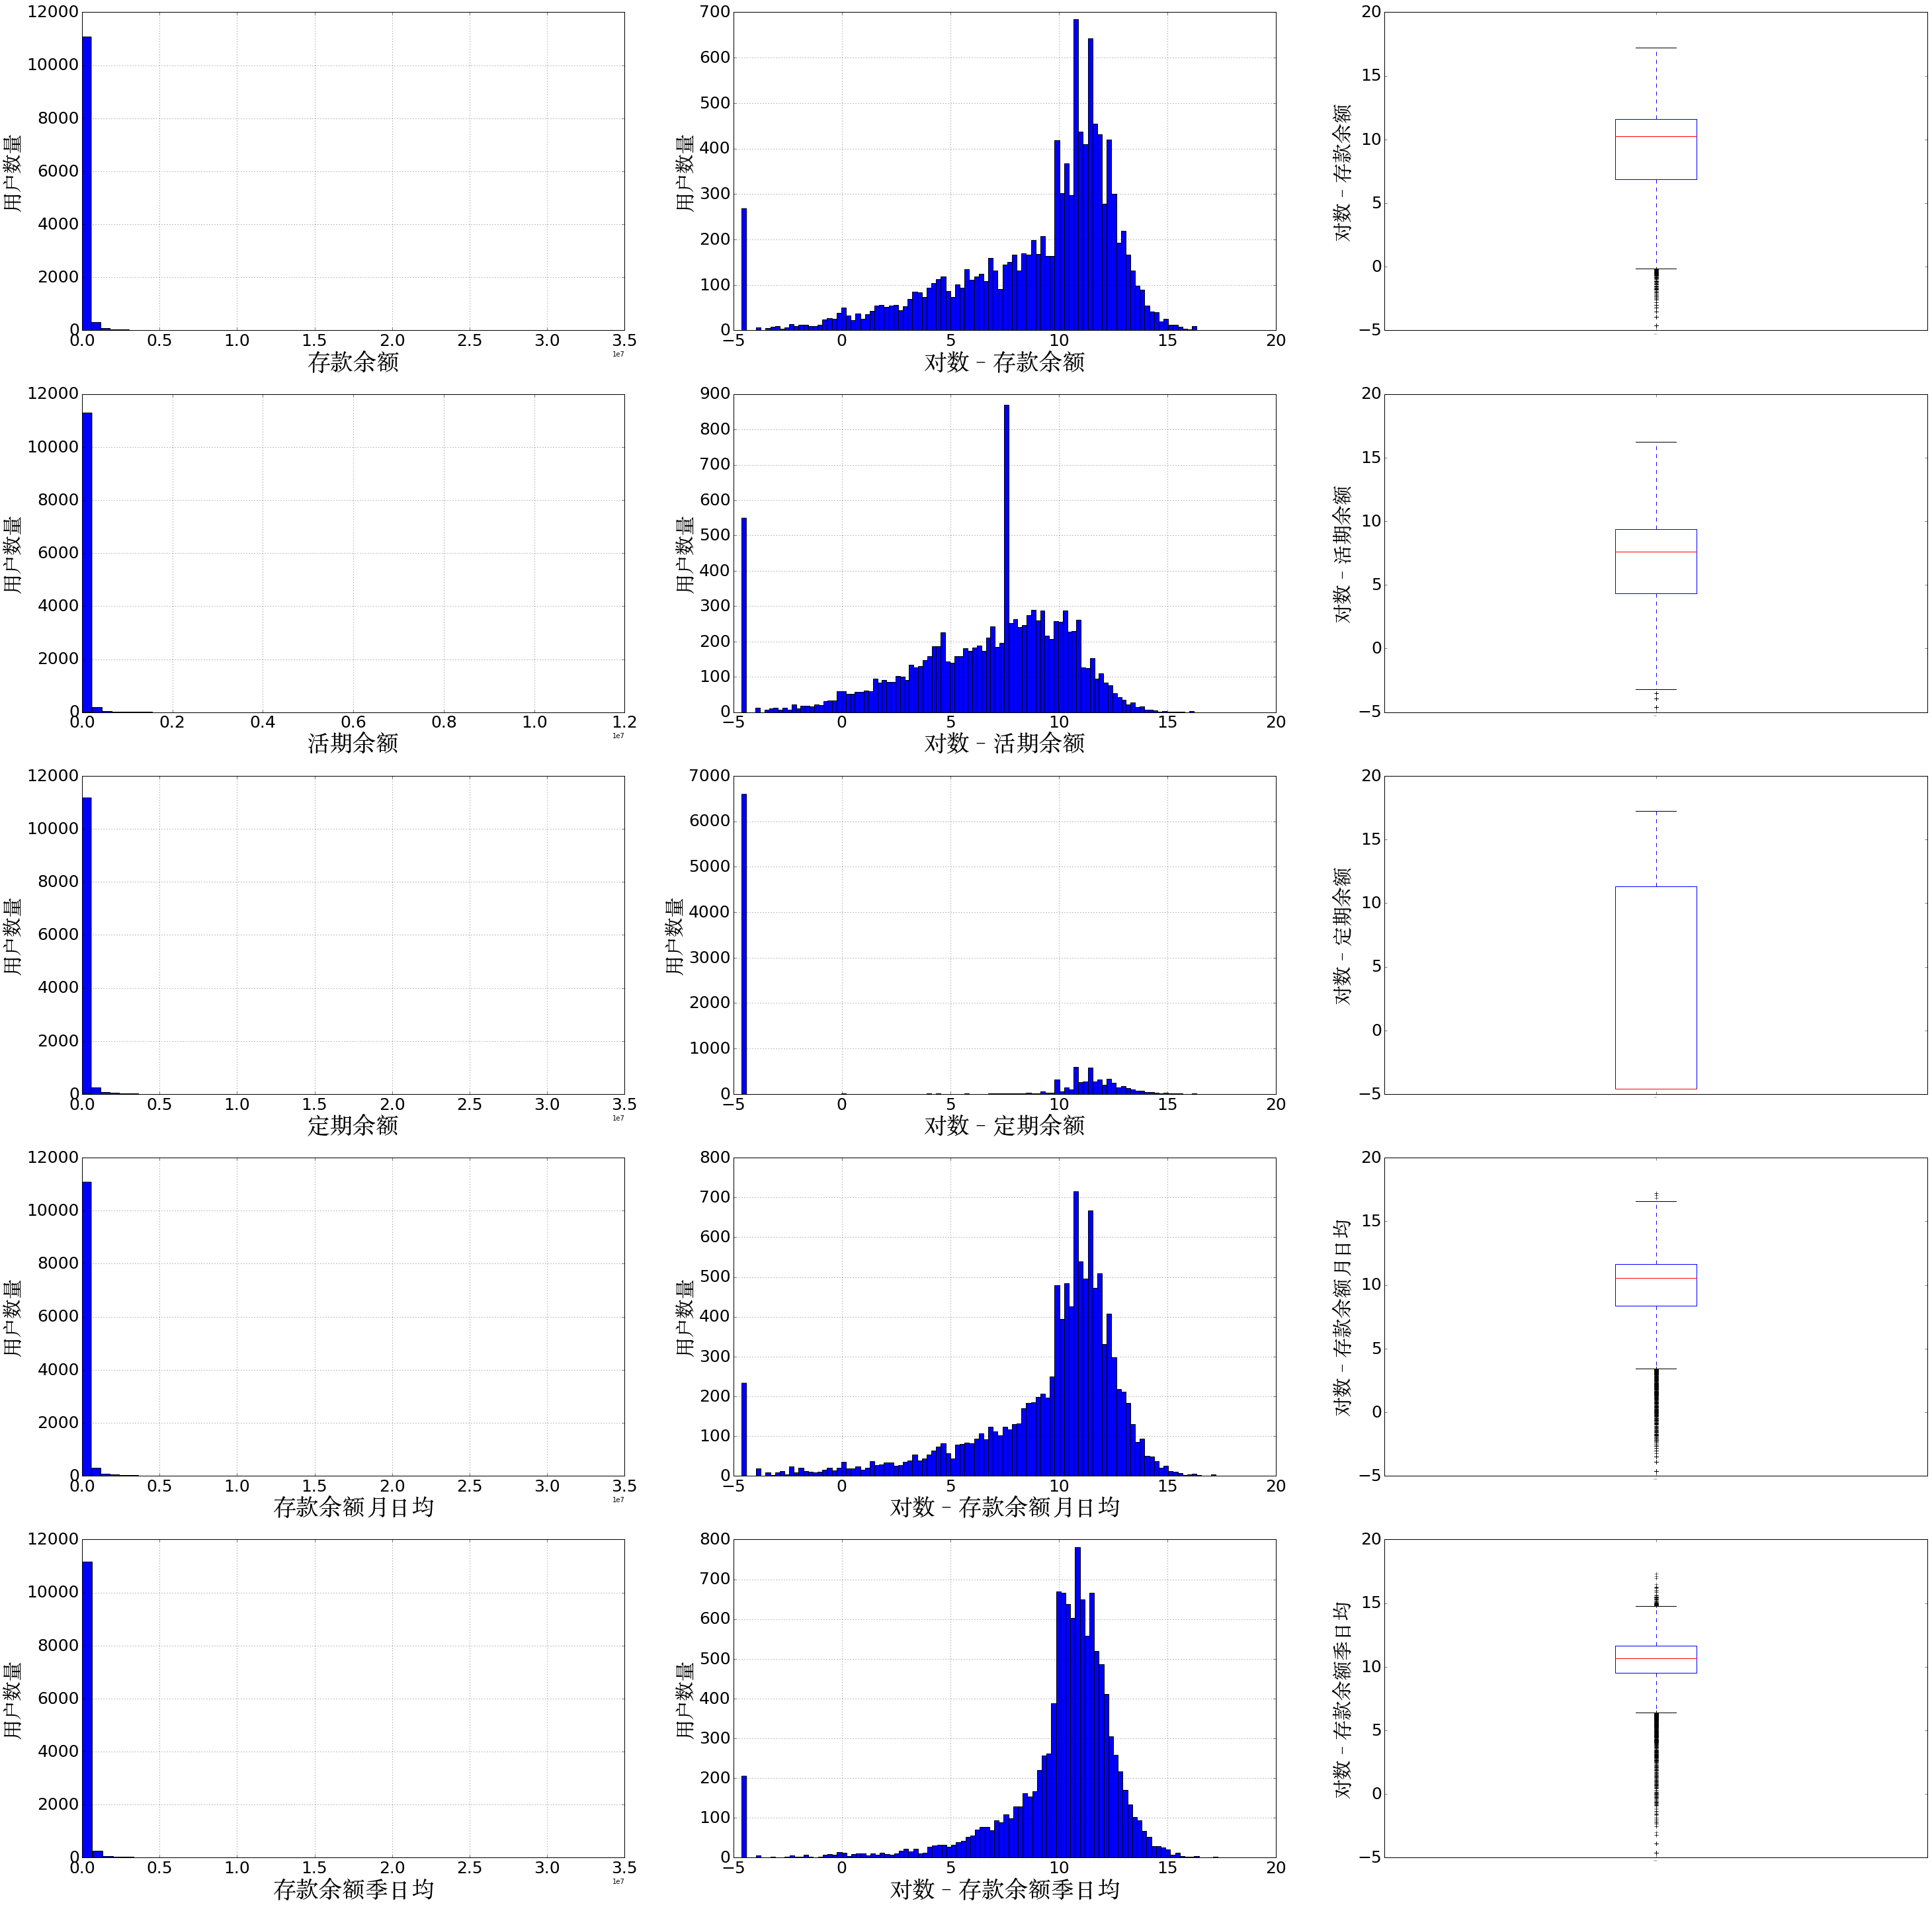

In [80]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
fig, ax = plt.subplots(nrows= 5, ncols= 3, figsize=(50, 50))


for r, col in enumerate(['存款余额', '活期余额', '定期余额', '存款余额月日均', '存款余额季日均']):
    logcol = '对数－'+col
    savingsDf[logcol] = np.log(savingsDf[col])
    #replace -inf with min value
    minvalue = savingsDf.ix[savingsDf[logcol]!=-np.inf, [logcol]].min().values[0]
    savingsDf[logcol].replace(-np.inf, minvalue, inplace=True)
    

    savingsDf[col].hist(bins=50, ax= ax[(r,0)])
    ax[(r,0)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,0)].set_xlabel(col, fontproperties=font, fontsize=35)
    
    savingsDf[logcol].hist(bins=100, ax= ax[(r,1)])
    ax[(r,1)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,1)].set_xlabel(logcol, fontproperties=font, fontsize=35) 
    
    savingsDf[logcol].plot(kind='box', ax= ax[(r, 2)])
    ax[(r,2)].set_ylabel(logcol, fontproperties=font, fontsize=30)
    #ax[(r,2)].set_title(logcol, fontproperties=font, fontsize=35)    
    
    for c in (0,1,2):
        for tick in ax[(r,c)].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in ax[(r,c)].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)
    for tick in ax[(r,2)].xaxis.get_major_ticks():
        tick.label.set_fontsize(1)



* 从存款余额对数图中，很明显能看出整个分布是由2个分布组成，有很明显的不同的Kurtosis以及mean值
* 从活期余额对数图中，有一根bar的长度是mean值的三倍，需要仔细探索这部分客户，探查原因。并且这跟bar没有出现在存款余额对数图中，有数据错误？
* 从定期余额对数图中，定期存款在低金额区域没有用户，且有近一半的用户没有存定期。需要探查存定期的用户的分布情况。
* 金额为0的用户探查，在存款日均两个对数图中，能看出约有200个用户没有存款。而活期图中有500个用户没有存款，也就是说。大约有300个用户没有活期只有定期存款，需要再结合其他金融资产的情况再判断这些用户的特性。

### 探索余额对数图的超长bar

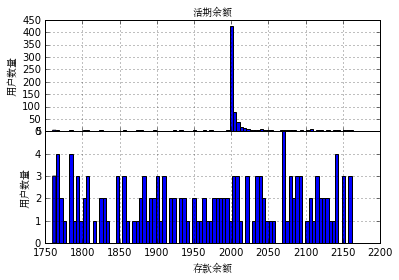

In [131]:
S = savingsDf['对数－活期余额']
count,division = np.histogram(S, bins=100)
barindex = np.argmax(count)
lb, up = division[barindex], division[barindex+1]
barS = savingsDf.ix[(S>=lb)&(S<up), '活期余额']

#plotting
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
barS.hist(bins=90,ax=ax[0])
ax[0].set_title('活期余额', fontproperties = font)
ax[0].set_ylabel('用户数量', fontproperties = font)


barS2 = savingsDf.ix[(savingsDf['存款余额']>=barS.min())&
                     (savingsDf['存款余额']<=barS.max()), '存款余额']
barS2.hist(bins=90, ax=ax[1])
ax[1].set_xlabel('存款余额', fontproperties = font)
ax[1].set_ylabel('用户数量', fontproperties = font)
plt.subplots_adjust(hspace=0)
plt.show()

#### 活期余额在2000元左右peaks， 但是在存款余额中却没有，是否为数据bug？

### 探索定期存款非0的用户群体

In [136]:
#count the number of user with zero 定期余额
zeroN = savingsDf.ix[savingsDf['定期余额']<1, '定期余额'].shape[0]
print('一共有{0}用户不拥有任何定期存款！占比 {1:.2f}％。'.format(zeroN, 100*zeroN/savingsDf.shape[0]))

一共有6613用户不拥有任何定期存款！占比 57.03％。


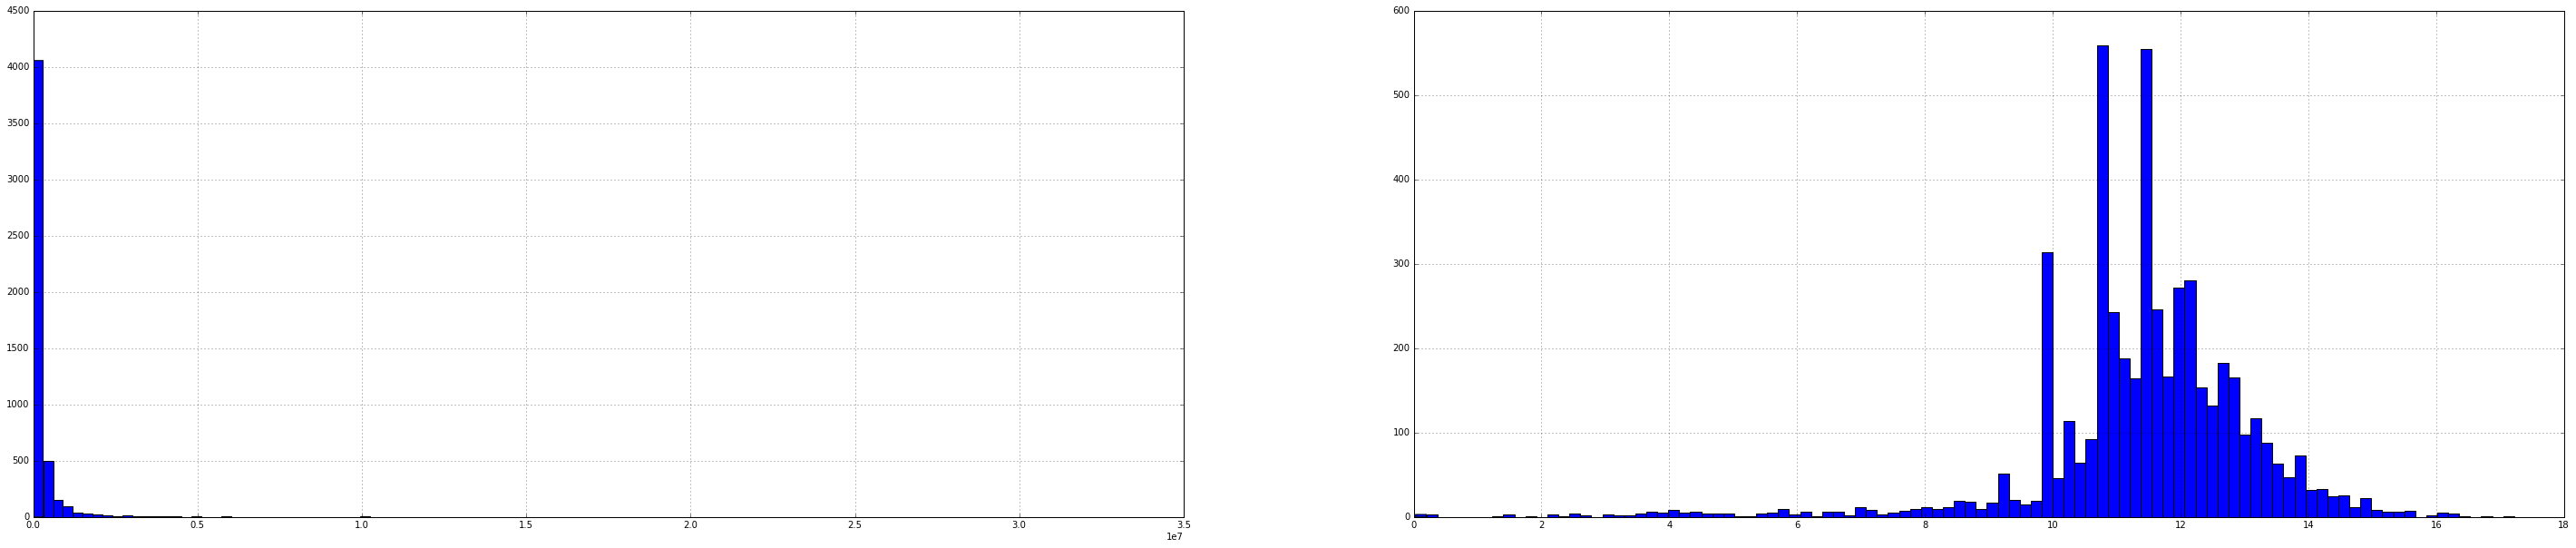

In [149]:
timeDepositDf = savingsDf.ix[savingsDf['定期余额']>1, ['定期余额', '对数－定期余额']]
axs = [plt.subplot(1,2,i) for i in (1,2)]
timeDepositDf['定期余额'].hist(bins=100, ax= axs[0],figsize=(50, 10))
timeDepositDf['对数－定期余额'].hist(bins=100, ax = axs[1], figsize=(50, 10))

* 有定期存款的用户的对数分布还是比较normal的，特点就是mean比活期高很多，有3个定期存款金额区间很受欢迎。

## B. 用户理财情况 

In [162]:
finanDf = masterDf.ix[:, ['理财余额', '理财余额月日均', '理财余额季日均', '理财余额年日均',
       '理财占比']]
finanDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
理财余额,11596.0,157413.252597,869125.967145,0.0,0.0,0.0,70040.5100,31000000.00
理财余额月日均,11596.0,154305.511375,848452.185174,0.0,0.0,0.0,73108.9050,31000000.00
理财余额季日均,11596.0,159140.084463,807805.775304,0.0,0.0,0.0,92455.3950,30594032.37
理财余额年日均,11596.0,159140.084463,807805.775304,0.0,0.0,0.0,92455.3950,30594032.37
理财占比,11596.0,0.207717,0.352076,0.0,0.0,0.0,0.3704,1.00


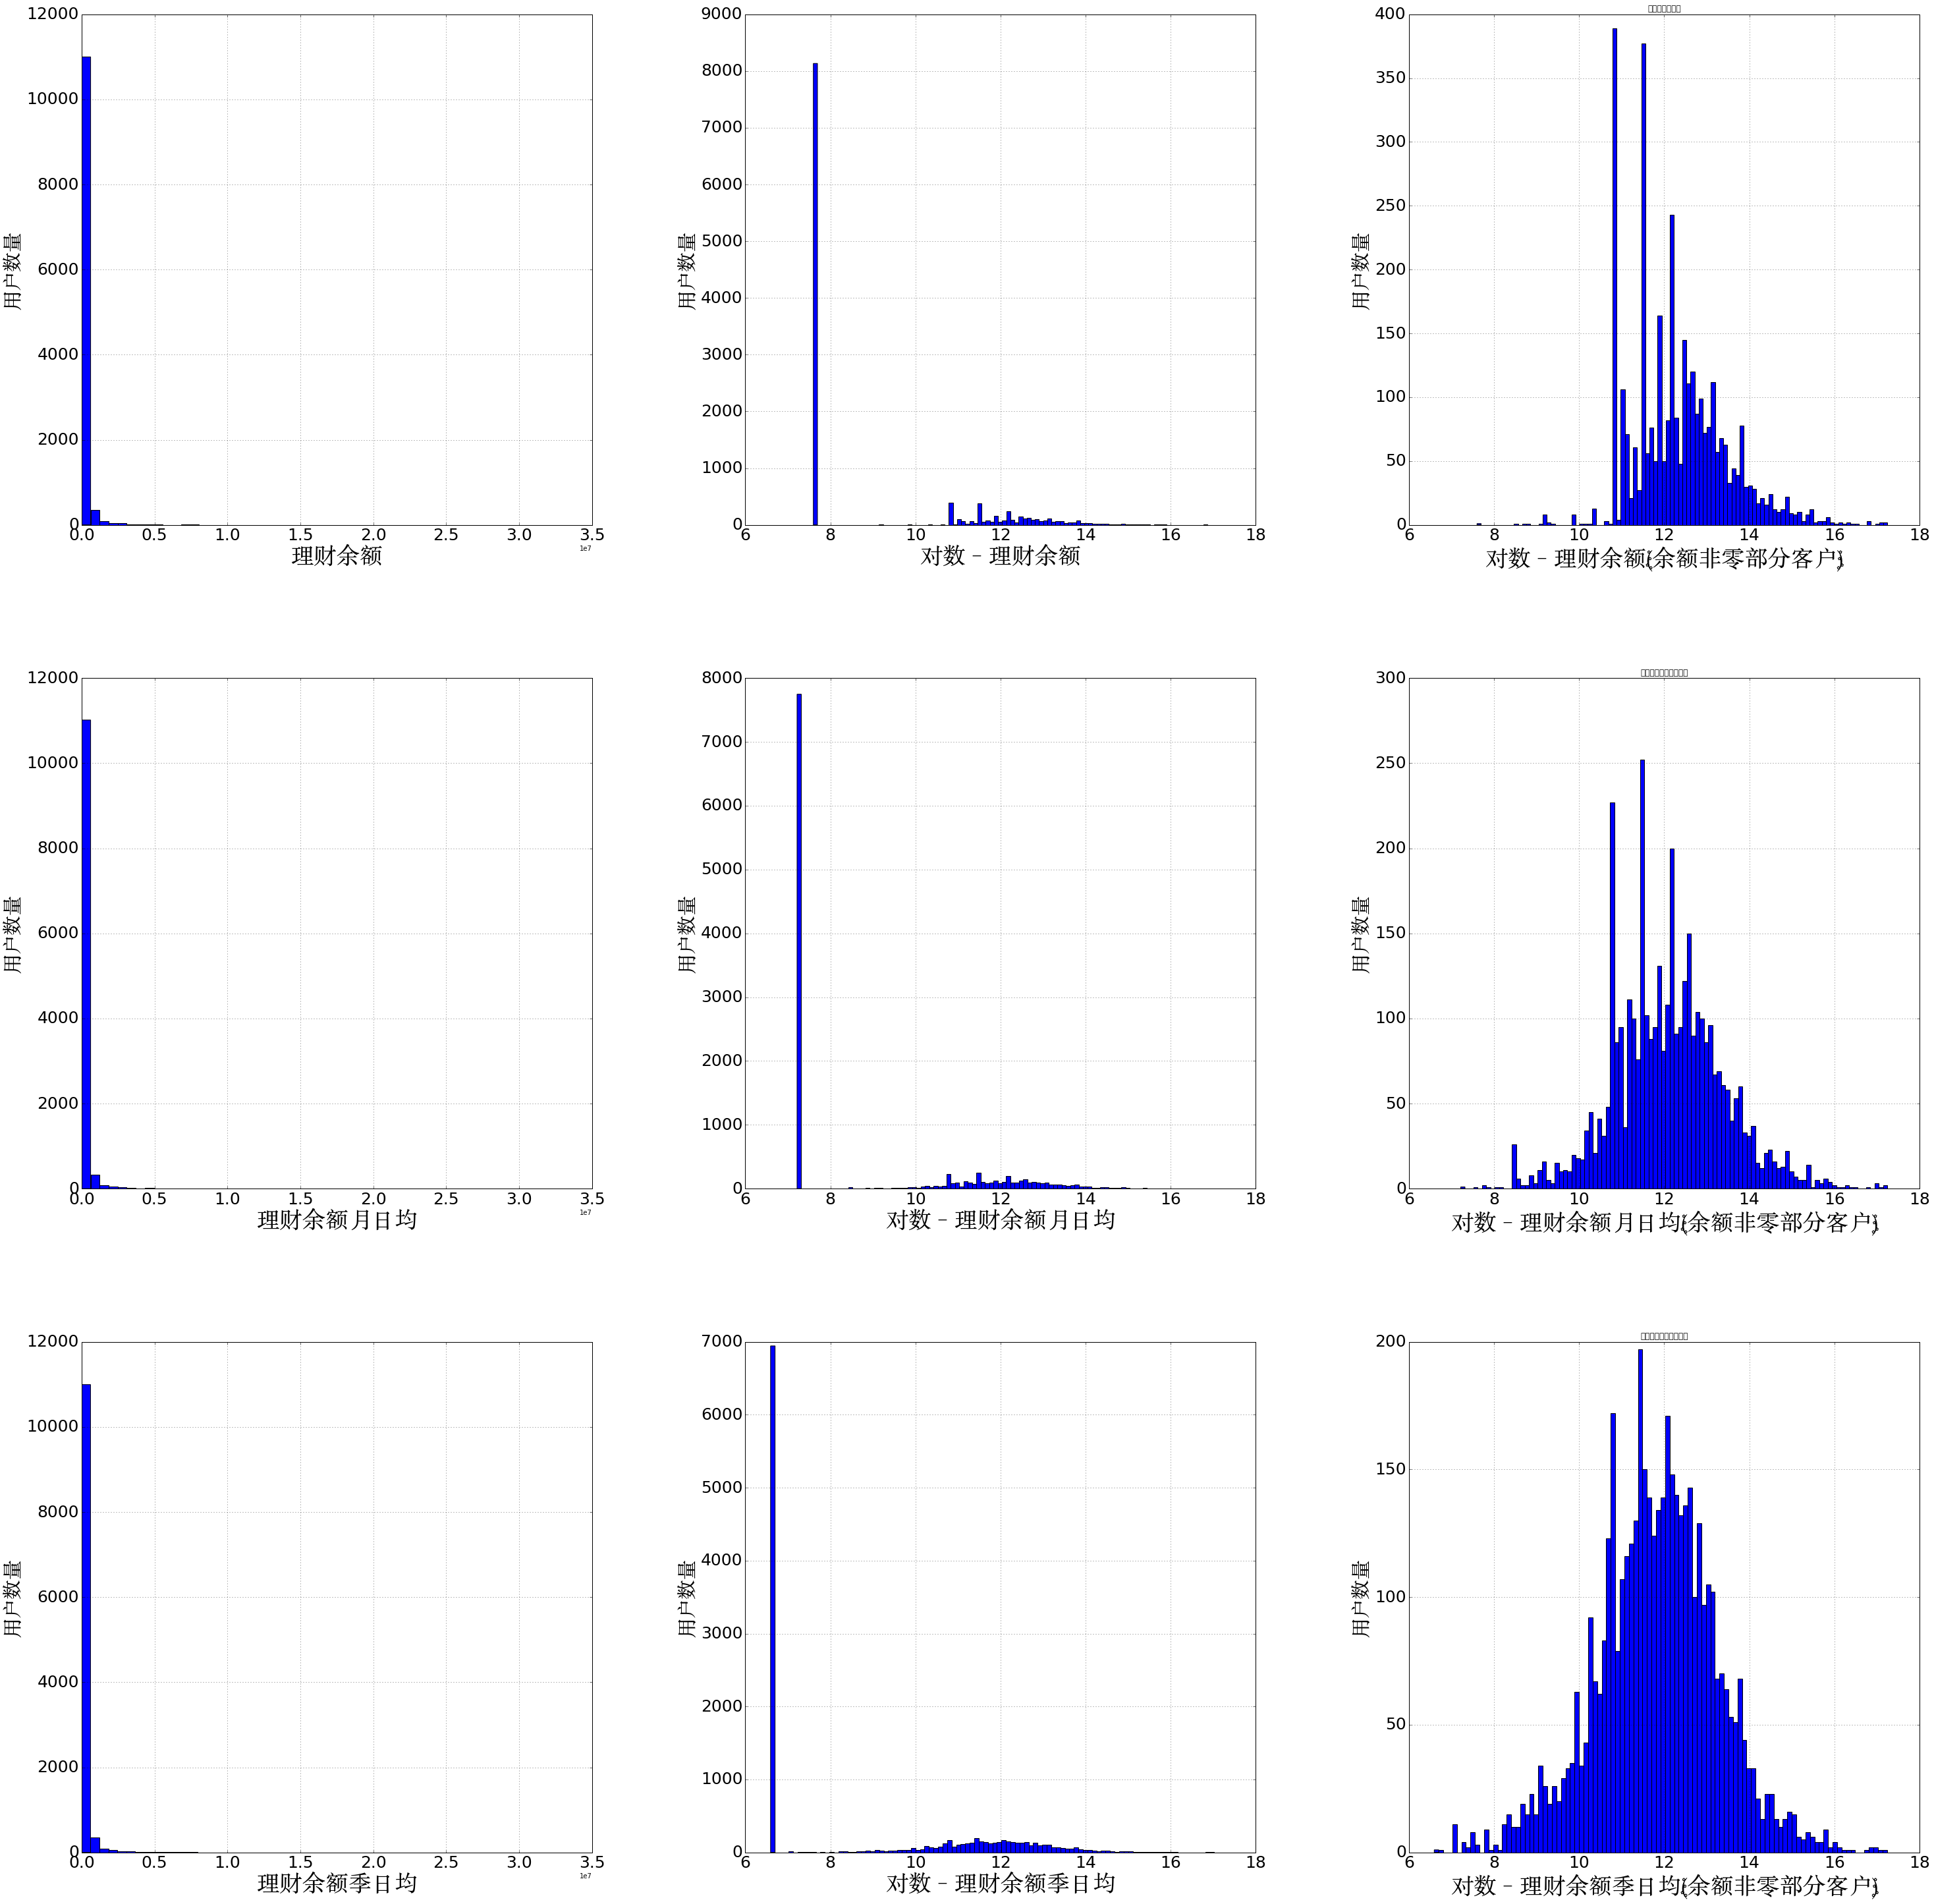

In [166]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize=(50, 50))


for r, col in enumerate(['理财余额', '理财余额月日均', '理财余额季日均']):
    logcol = '对数－'+col
    finanDf[logcol] = np.log(finanDf[col])
    #replace -inf with min value
    minvalue = finanDf.ix[finanDf[logcol]!=-np.inf, [logcol]].min().values[0]
    finanDf[logcol].replace(-np.inf, minvalue, inplace=True)
    

    finanDf[col].hist(bins=50, ax= ax[(r,0)])
    ax[(r,0)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,0)].set_xlabel(col, fontproperties=font, fontsize=35)
    
    finanDf[logcol].hist(bins=100, ax= ax[(r,1)])
    ax[(r,1)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,1)].set_xlabel(logcol, fontproperties=font, fontsize=35) 
    
    finanDf.ix[finanDf[col]>1, [logcol]].hist(bins=100, ax = ax[(r, 2)])
    ax[(r,2)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,2)].set_xlabel(logcol+'(余额非零部分客户)', fontproperties=font, fontsize=35)    
    
    for c in (0,1,2):
        for tick in ax[(r,c)].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in ax[(r,c)].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)


* 绝大部分客户没有参与理财
* 从参与理财的用户分布能看出，对数分布很正太化，并且有3个理财余额区间客户数量非常多
* 理财余额季日均有7000个客户为0， 这些客户应该完全没有买个理财产品， 理财余额有8000个客户为0。新增1000个清空理财产品的客户。
  

## C. 用户金融资产情况 

In [167]:
assetDf = masterDf.ix[:, ['金融资产余额', '金融资产余额月日均', '金融资产余额季日均']]
assetDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
金融资产余额,11596.0,423117.484295,1.719784e+06,0.0,44866.2950,117154.155,338229.8275,94707124.65
金融资产余额月日均,11596.0,424846.423043,1.743226e+06,0.0,48026.3475,119466.525,334806.2400,94226833.44
金融资产余额季日均,11596.0,420998.980083,1.663608e+06,0.0,50000.0000,120334.530,330224.9675,83830104.20


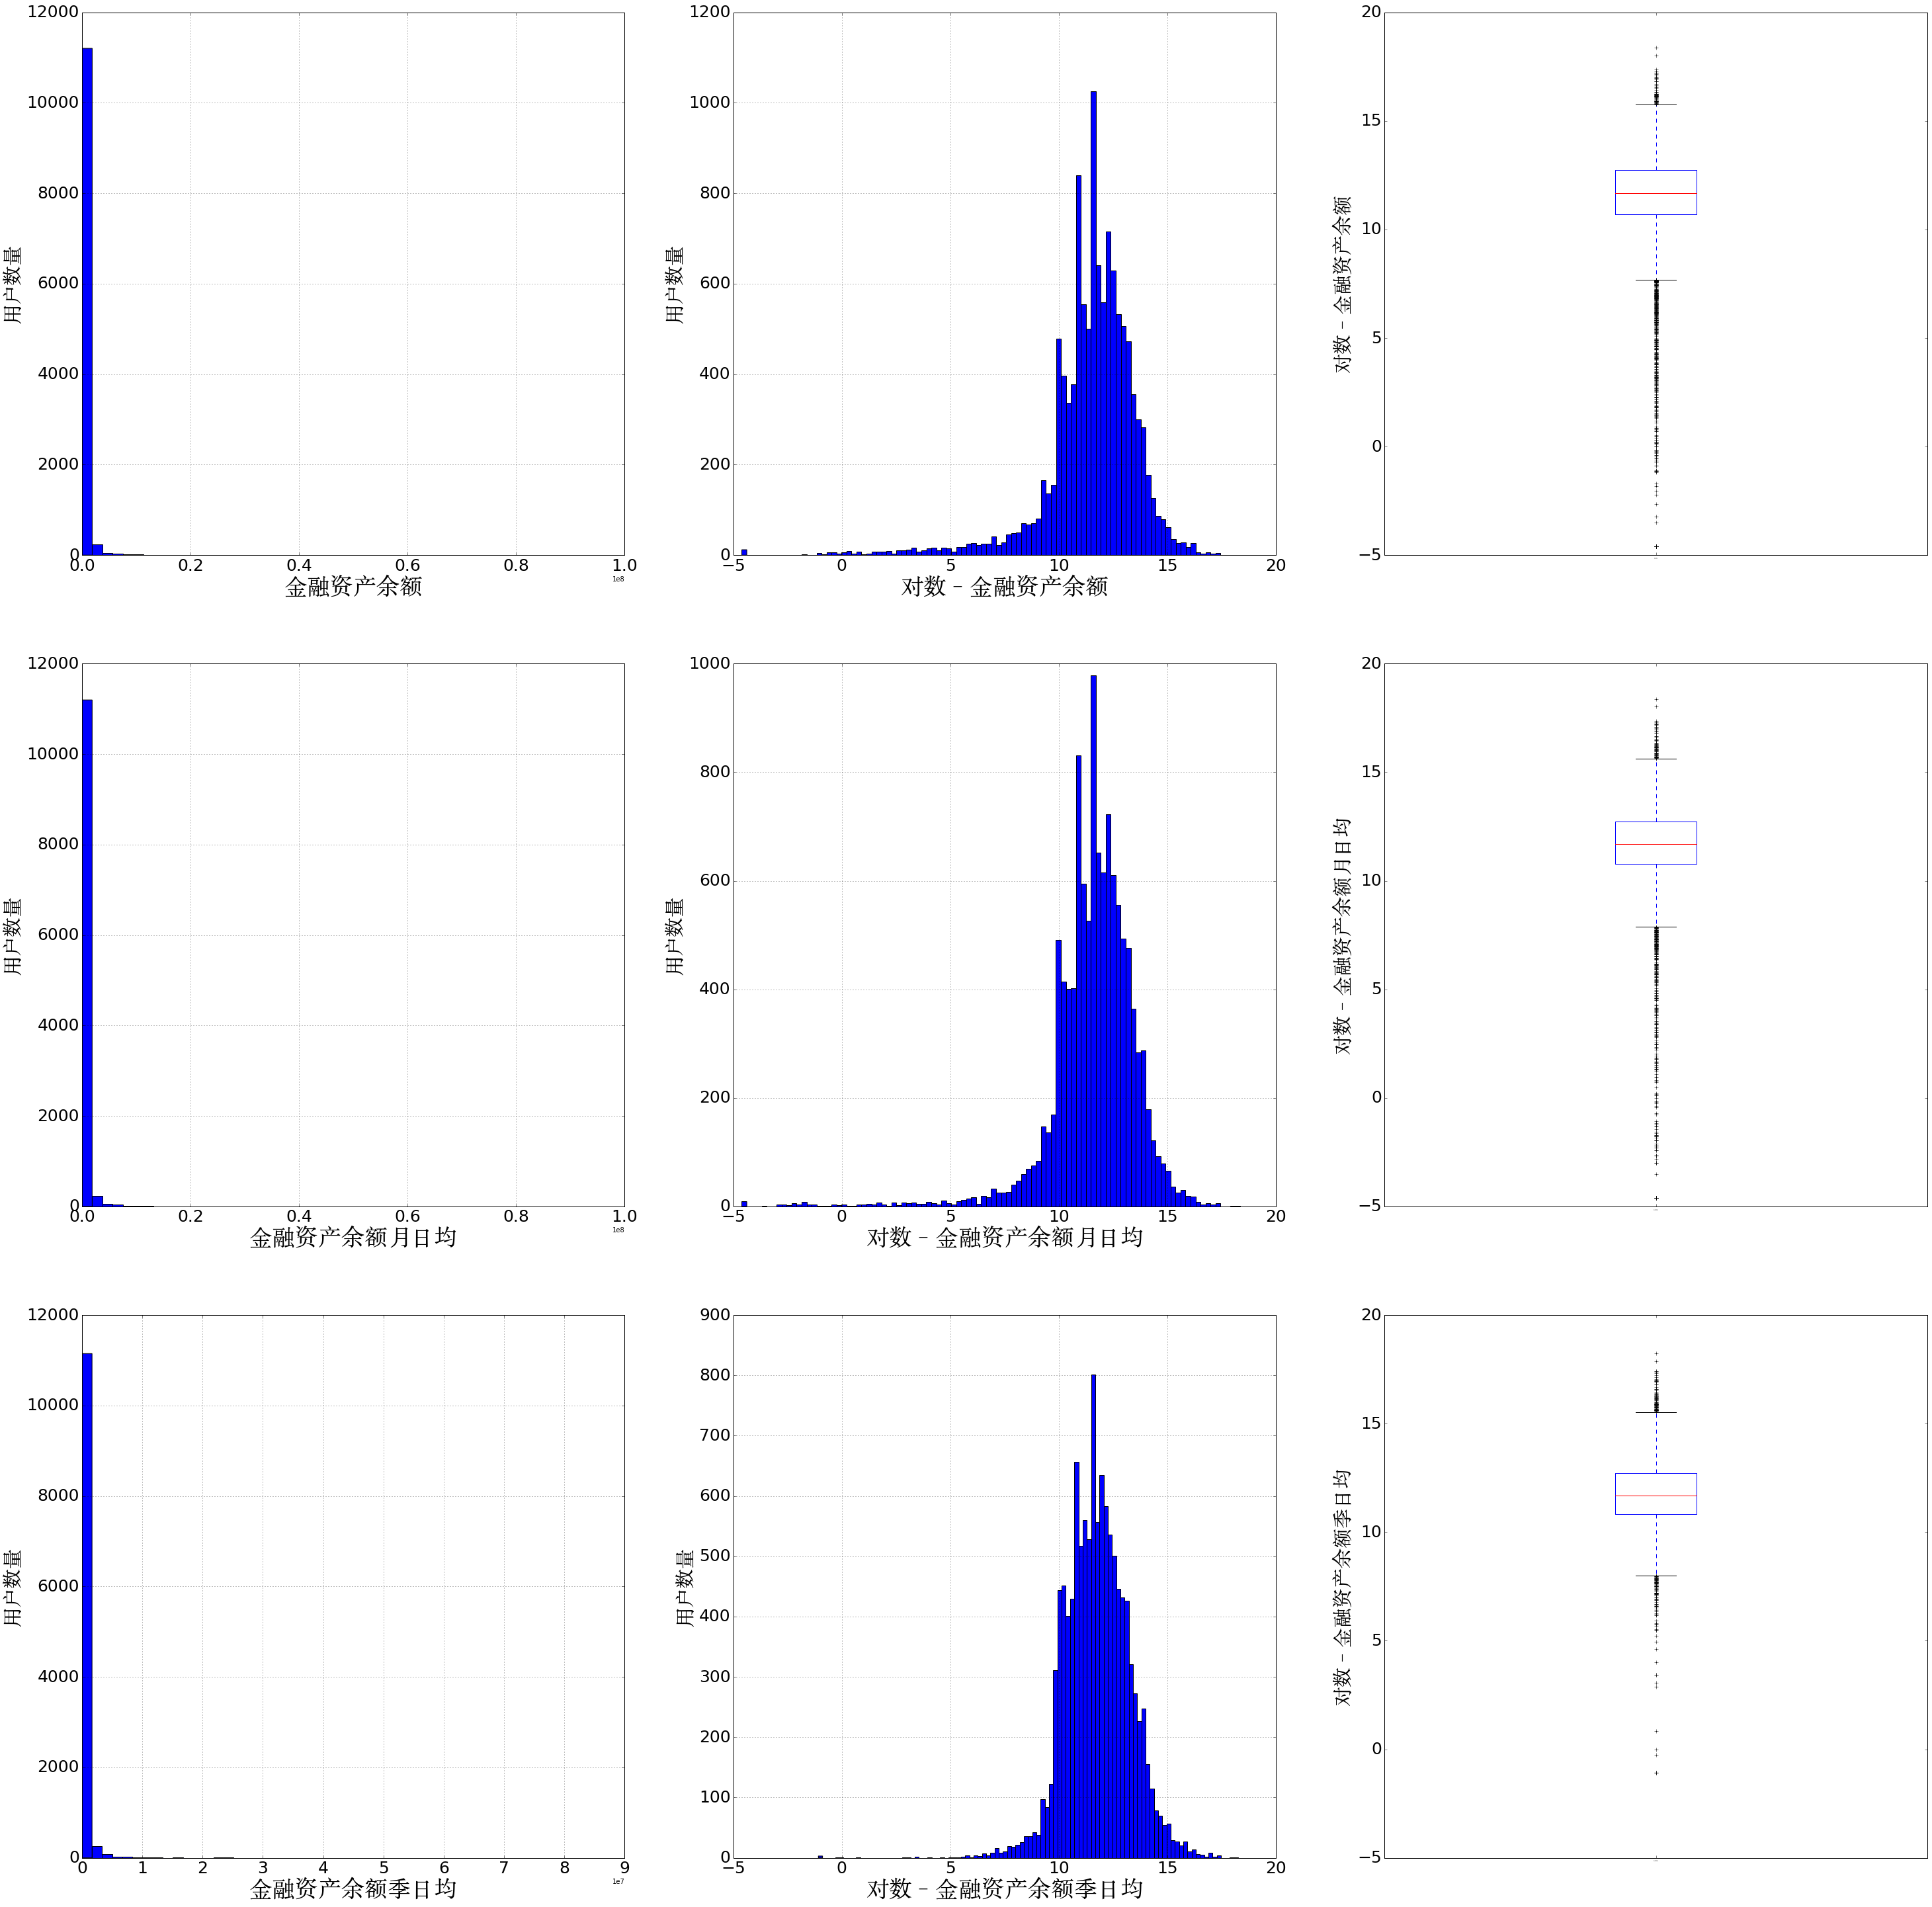

In [169]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize=(50, 50))


for r, col in enumerate(['金融资产余额', '金融资产余额月日均', '金融资产余额季日均']):
    logcol = '对数－'+col
    assetDf[logcol] = np.log(assetDf[col])
    #replace -inf with min value
    minvalue = assetDf.ix[assetDf[logcol]!=-np.inf, [logcol]].min().values[0]
    assetDf[logcol].replace(-np.inf, minvalue, inplace=True)
    

    assetDf[col].hist(bins=50, ax= ax[(r,0)])
    ax[(r,0)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,0)].set_xlabel(col, fontproperties=font, fontsize=35)
    
    assetDf[logcol].hist(bins=100, ax= ax[(r,1)])
    ax[(r,1)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,1)].set_xlabel(logcol, fontproperties=font, fontsize=35) 
    
    assetDf[logcol].plot(kind='box', ax= ax[(r, 2)])
    ax[(r,2)].set_ylabel(logcol, fontproperties=font, fontsize=30)
    #ax[(r,2)].set_title(logcol, fontproperties=font, fontsize=35)    
    
    for c in (0,1,2):
        for tick in ax[(r,c)].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in ax[(r,c)].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)
    for tick in ax[(r,2)].xaxis.get_major_ticks():
        tick.label.set_fontsize(1)



* log后，取个median倍数的区间，去去outliers就ok了。

## D. 用户国债余额情况 

In [188]:
count = (masterDf['国债余额']>0).sum()
print('在 {0} 个用户中，只有 {1} 个用户购买了国债， 占比 {2:.2f}％。'.format(masterDf.shape[0],
                                                       count, 100*count/masterDf.shape[0]))

在 11596 个用户中，只有 35 个用户购买了国债， 占比 0.30％。


* 删除此特征

## E. 用户基金情况

In [189]:
fundDf = masterDf.ix[:, ['基金市值', '基金市值月日均', '基金市值季日均']]
fundDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
基金市值,11596.0,72527.613239,894786.242143,0.0,0.0,0.0,8066.4975,63001694.17
基金市值月日均,11596.0,71695.950060,905796.109038,0.0,0.0,0.0,8934.8050,63001330.44
基金市值季日均,11596.0,69578.501255,851161.157713,0.0,0.0,0.0,9754.2800,55805267.85


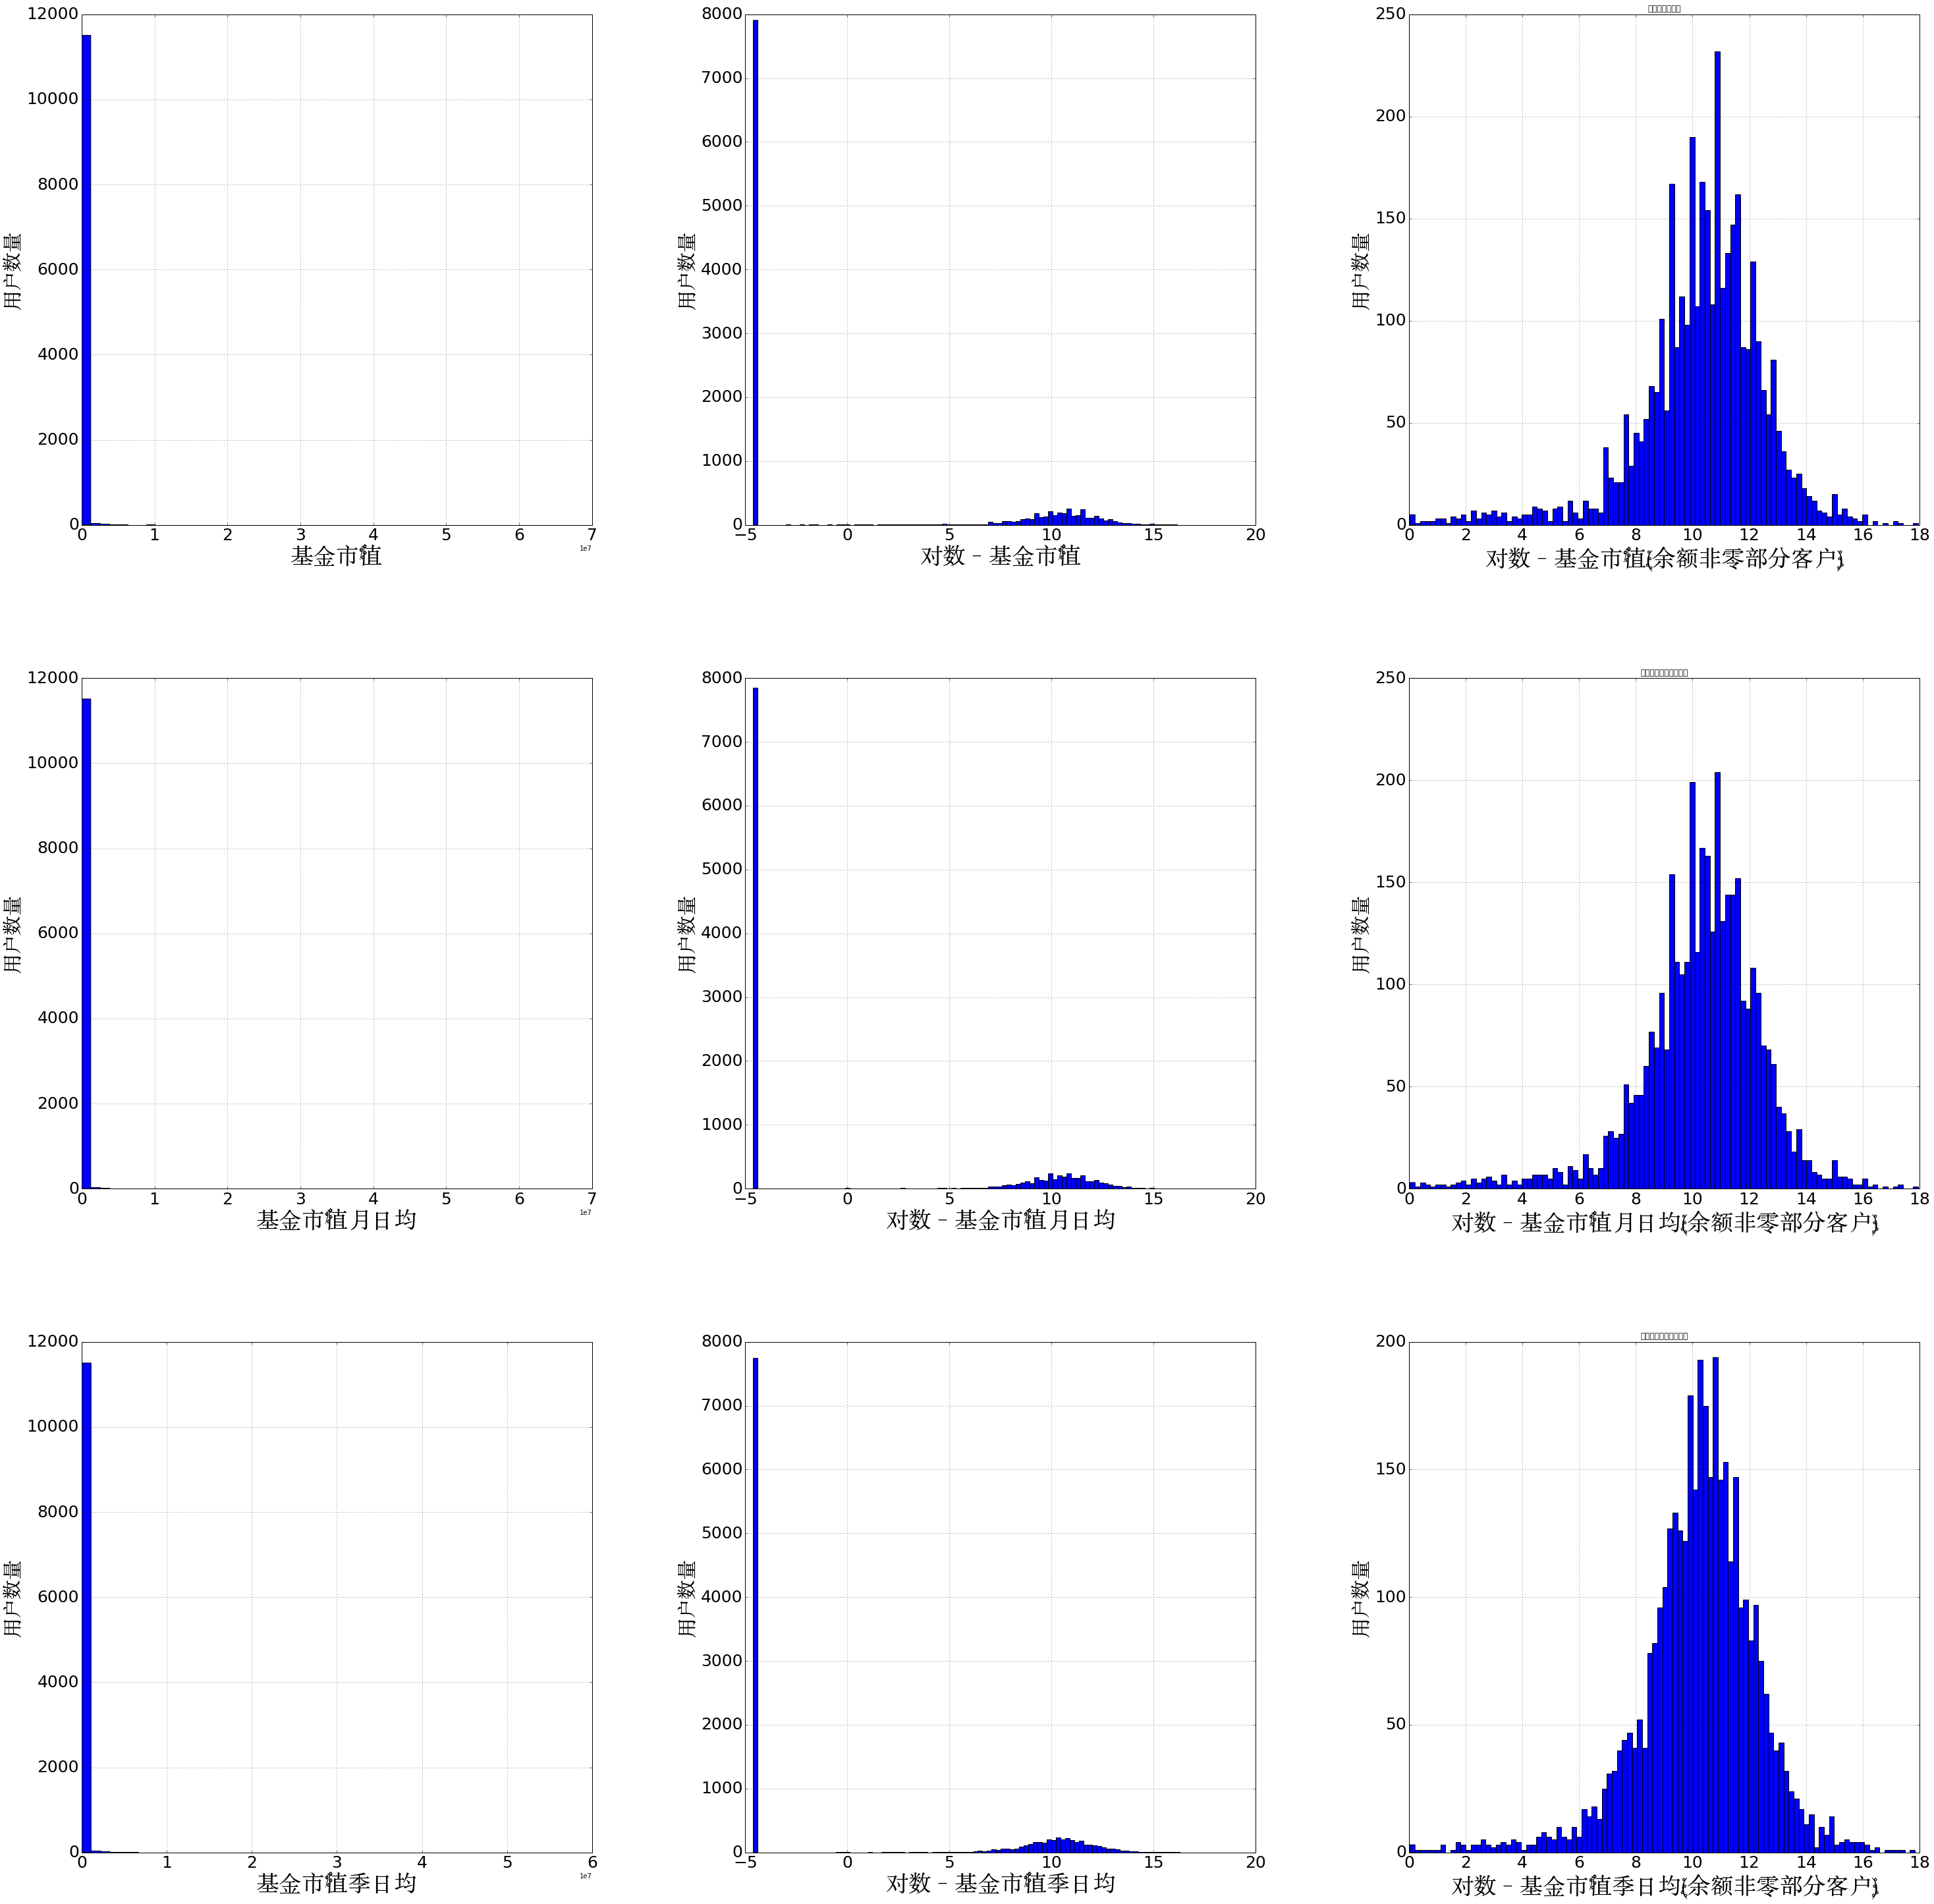

In [191]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize=(50, 50))


for r, col in enumerate(['基金市值', '基金市值月日均', '基金市值季日均']):
    logcol = '对数－'+col
    fundDf[logcol] = np.log(fundDf[col])
    #replace -inf with min value
    minvalue = fundDf.ix[fundDf[logcol]!=-np.inf, [logcol]].min().values[0]
    fundDf[logcol].replace(-np.inf, minvalue, inplace=True)
    

    fundDf[col].hist(bins=50, ax= ax[(r,0)])
    ax[(r,0)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,0)].set_xlabel(col, fontproperties=font, fontsize=35)
    
    fundDf[logcol].hist(bins=100, ax= ax[(r,1)])
    ax[(r,1)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,1)].set_xlabel(logcol, fontproperties=font, fontsize=35) 
    
    fundDf.ix[fundDf[col]>1, [logcol]].hist(bins=100, ax = ax[(r, 2)])
    ax[(r,2)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,2)].set_xlabel(logcol+'(余额非零部分客户)', fontproperties=font, fontsize=35)    
    
    for c in (0,1,2):
        for tick in ax[(r,c)].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in ax[(r,c)].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)


* 基金的分布于理财的分布大体一致，唯一有差别的就是理财有3个分离度很高的热门区间，而基金的热门区间分离度较低。

## E. 用户贷款情况

In [192]:
loanDf = masterDf[['贷款余额', '贷款余额月日均', '贷款余额季日均', '贷款额度']]
loanDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
贷款余额,11596.0,84839.092518,526855.705752,0.0,0.0,0.0,0.0,20000000.0
贷款余额月日均,11596.0,85742.879358,530322.296133,0.0,0.0,0.0,0.0,20000000.0
贷款余额季日均,11596.0,87813.571612,537050.025120,0.0,0.0,0.0,0.0,20000000.0
贷款额度,11596.0,8479.987832,96511.944054,-200000.0,0.0,0.0,0.0,5000000.0


/Users/xl-macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xl-macbook/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


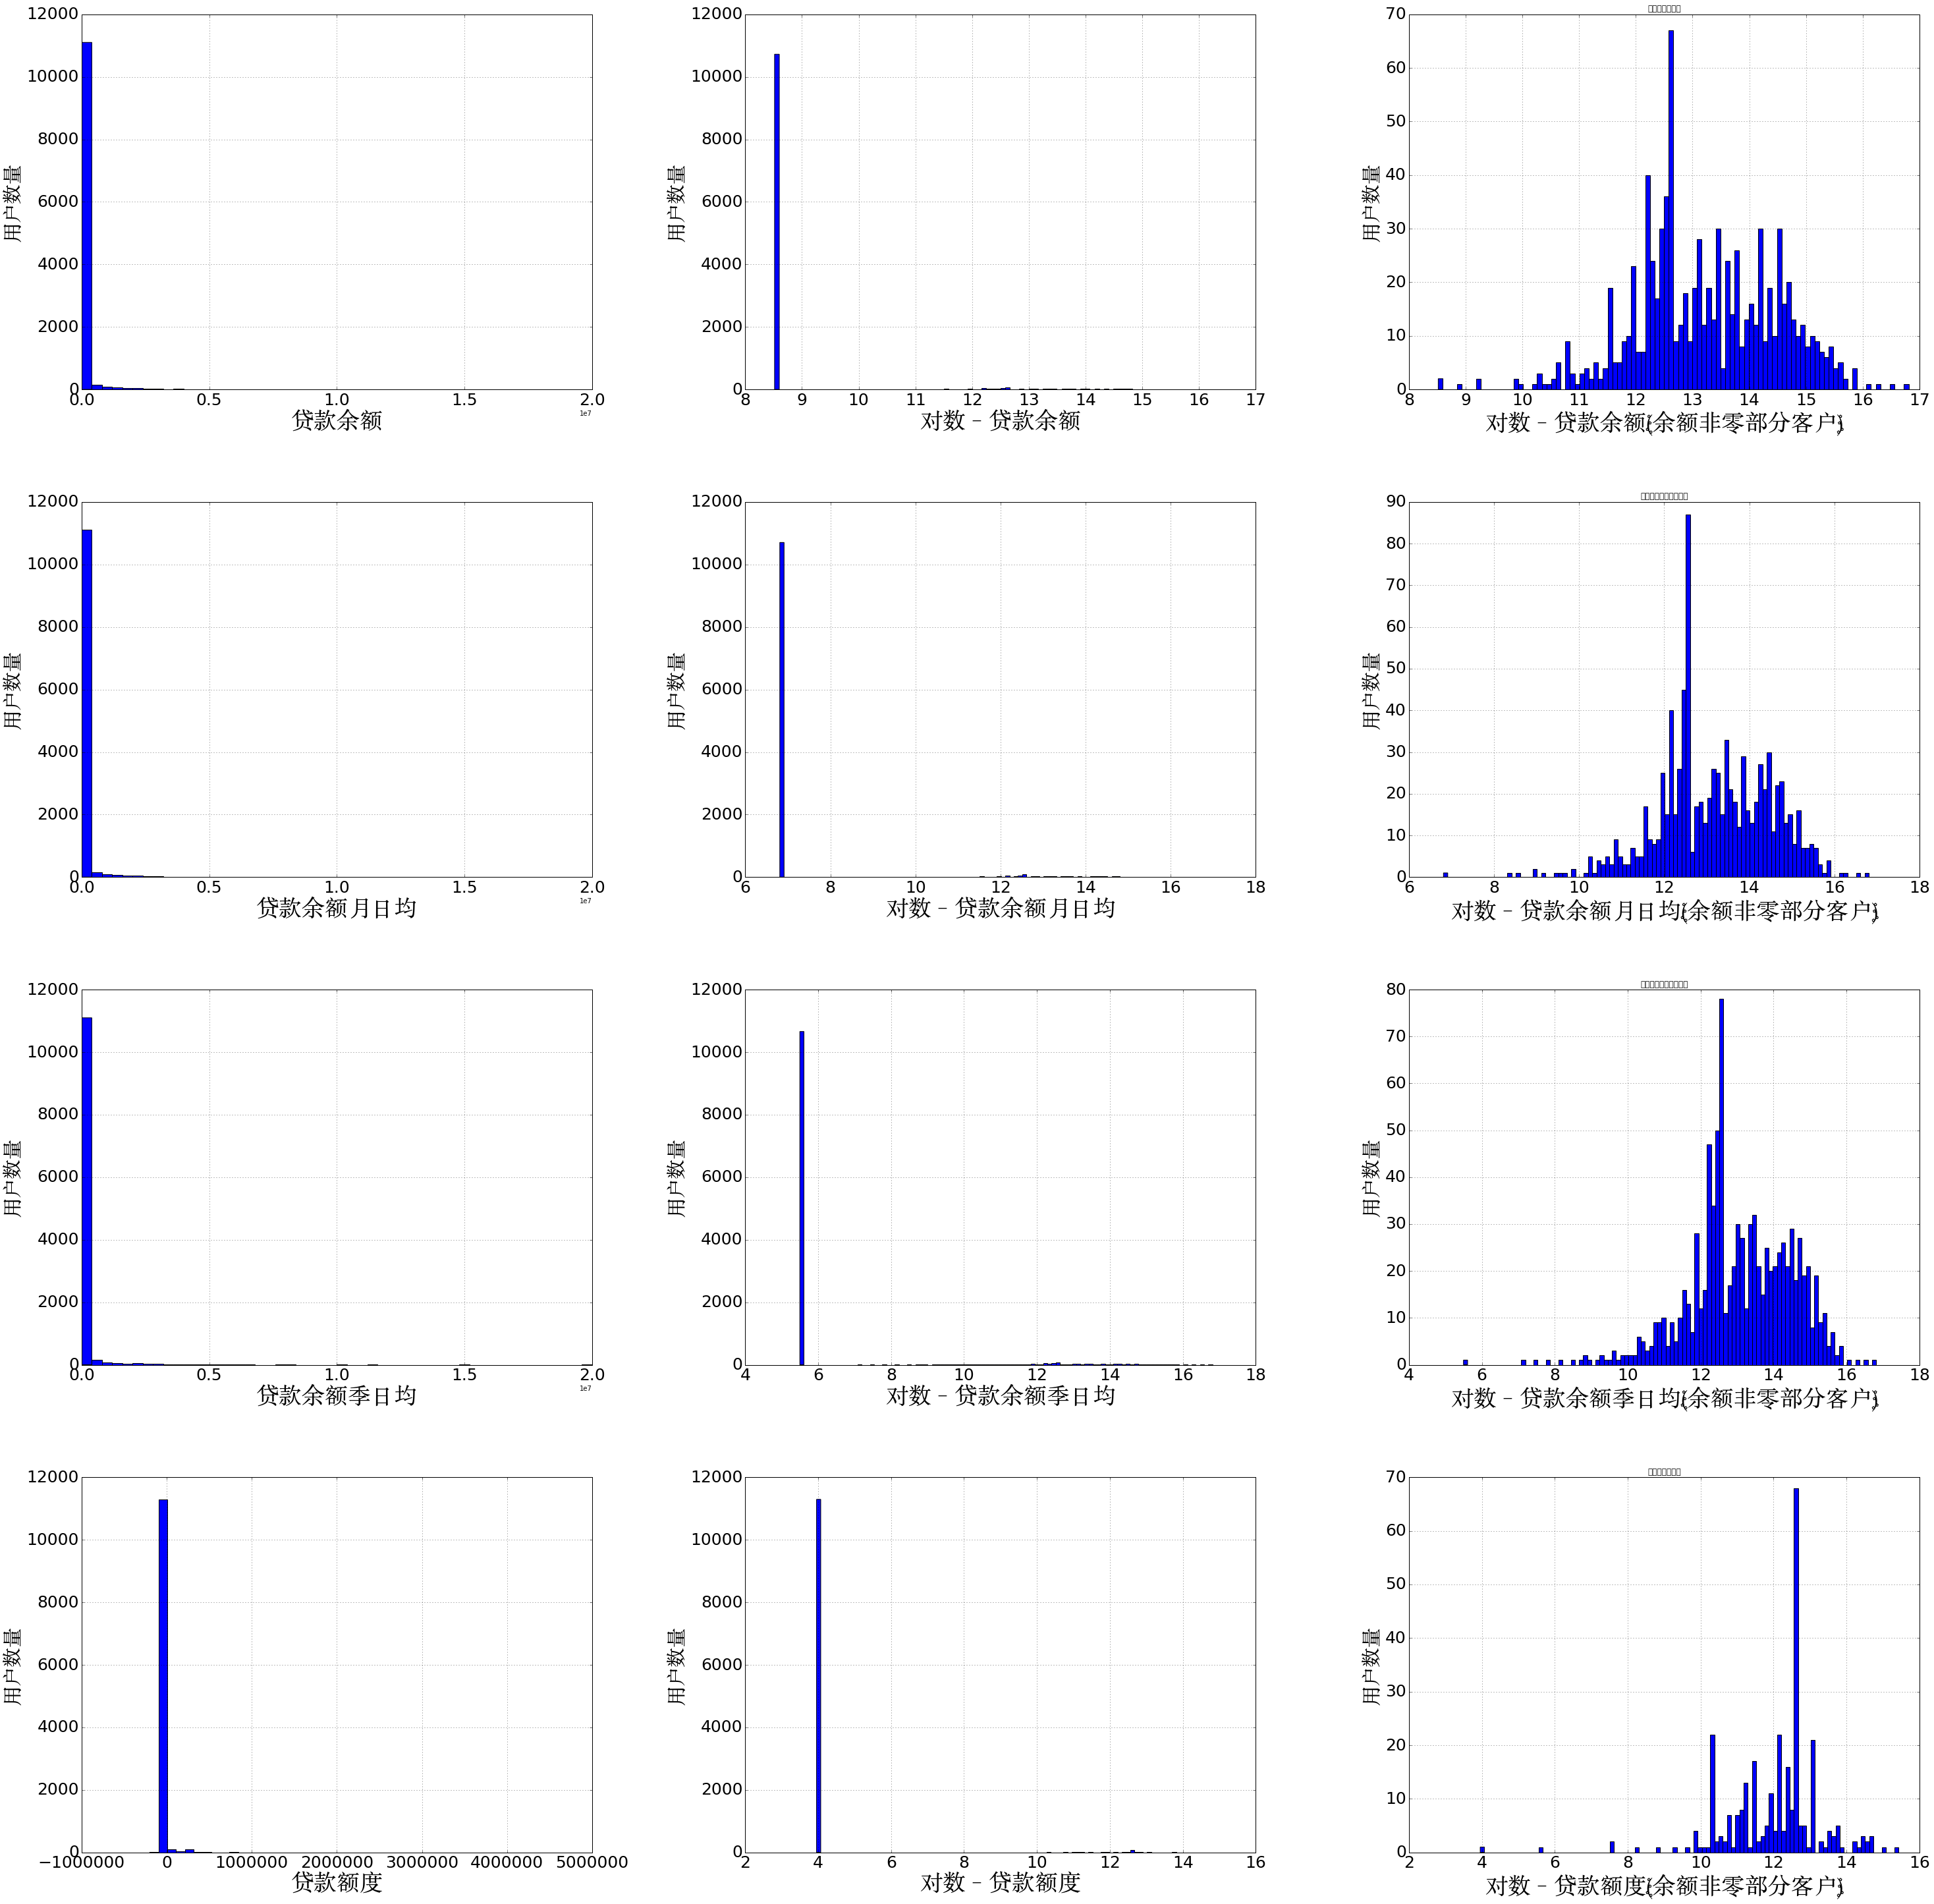

In [194]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
fig, ax = plt.subplots(nrows= 4, ncols= 3, figsize=(50, 50))


for r, col in enumerate(['贷款余额', '贷款余额月日均', '贷款余额季日均', '贷款额度']):
    logcol = '对数－'+col
    loanDf[logcol] = np.log(loanDf[col])
    #replace -inf with min value
    minvalue = loanDf.ix[loanDf[logcol]!=-np.inf, [logcol]].min().values[0]
    loanDf[logcol].replace(-np.inf, minvalue, inplace=True)
    

    loanDf[col].hist(bins=50, ax= ax[(r,0)])
    ax[(r,0)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,0)].set_xlabel(col, fontproperties=font, fontsize=35)
    
    loanDf[logcol].hist(bins=100, ax= ax[(r,1)])
    ax[(r,1)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,1)].set_xlabel(logcol, fontproperties=font, fontsize=35) 
    
    loanDf.ix[loanDf[col]>1, [logcol]].hist(bins=100, ax = ax[(r, 2)])
    ax[(r,2)].set_ylabel('用户数量', fontproperties=font, fontsize=30)
    ax[(r,2)].set_xlabel(logcol+'(余额非零部分客户)', fontproperties=font, fontsize=35)    
    
    for c in (0,1,2):
        for tick in ax[(r,c)].xaxis.get_major_ticks():
            tick.label.set_fontsize(25)
        for tick in ax[(r,c)].yaxis.get_major_ticks():
            tick.label.set_fontsize(25)


* 少部分用户进行了贷款，scale在上百左右。是否值得探索有待确认。

## 通过对比目标产品购买，继续探索用户资产情况 

In [246]:
targetDf = masterDf.ix[:, ['金融资产代码_107', '金融资产代码_130', '金融资产代码_170']]
targetDf['shape_107'] = targetDf['金融资产代码_107'].map(lambda x: 'o' if x==1 else 'v')
targetDf['color_107'] = targetDf['金融资产代码_107'].map(lambda x: 'r' if x==1 else 'b')
targetDf['color_130'] = targetDf['金融资产代码_130'].map(lambda x: 'r' if x==1 else 'b')
targetDf['color_170'] = targetDf['金融资产代码_170'].map(lambda x: 'r' if x==1 else 'b')

capitalDf = pd.concat([savingsDf, finanDf, fundDf, loanDf, assetDf], axis=1)
capitalDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
存款余额,11596.0,152332.461519,6.437289e+05,0.000000,979.830000,29034.740000,108224.460000,3.014449e+07
活期余额,11596.0,32733.975580,2.348407e+05,0.000000,75.255000,1983.160000,12046.727500,1.105108e+07
定期余额,11596.0,119592.017020,5.945578e+05,0.000000,0.000000,0.000000,80000.000000,3.013000e+07
存款余额月日均,11596.0,158031.849856,7.175952e+05,0.000000,4309.360000,39095.430000,116272.502500,3.014406e+07
存款余额季日均,11596.0,151500.094599,6.576125e+05,0.000000,13953.025000,43148.745000,113914.440000,3.340692e+07
存款余额年日均,11596.0,151500.094599,6.576125e+05,0.000000,13953.025000,43148.745000,113914.440000,3.340692e+07
存款占比,11596.0,0.536119,4.518484e-01,0.000000,0.013175,0.599150,1.000000,1.000000e+00
log存款余额,11596.0,8.859543,4.078273e+00,-4.605170,6.887379,10.276248,11.591963,1.722151e+01
log活期余额,11596.0,6.491991,4.103060e+00,-4.605170,4.320881,7.592447,9.396548,1.621804e+01
log定期余额,11596.0,2.283078,8.007362e+00,-4.605170,-4.605170,-4.605170,11.289782,1.722103e+01


### 总金融资产 

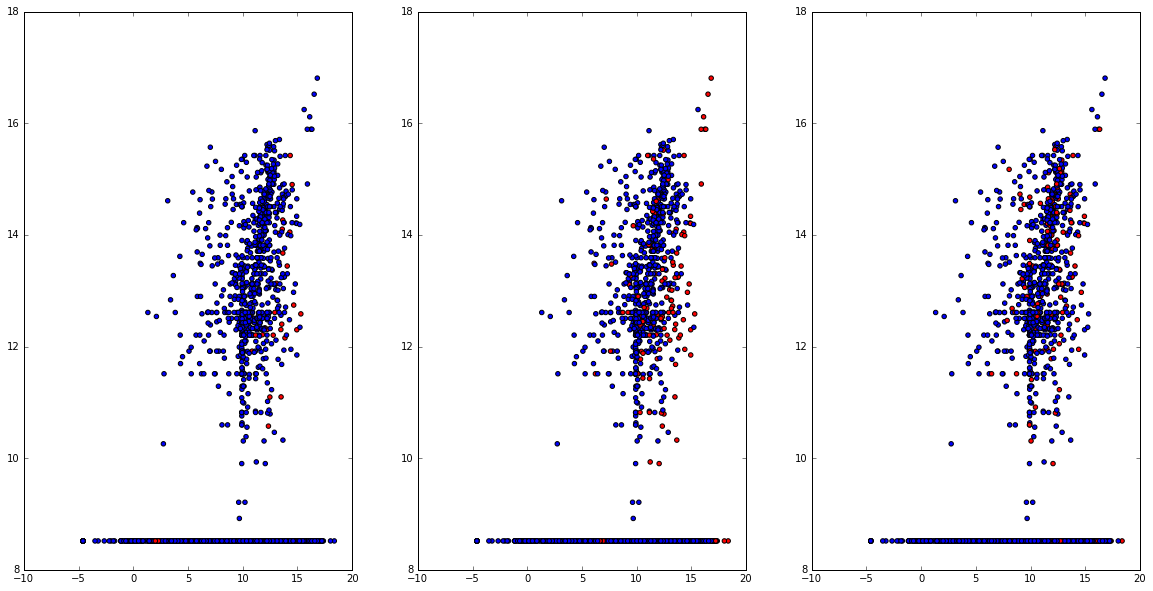

In [255]:

fig, ax = plt.subplots(ncols=3, figsize=(20,10))
ax[0].scatter(capitalDf['对数－金融资产余额'].values, capitalDf['对数－贷款余额'].values, c= list(targetDf['color_107'].values))
ax[1].scatter(capitalDf['对数－金融资产余额'].values, capitalDf['对数－贷款余额'].values, c= list(targetDf['color_130'].values))
ax[2].scatter(capitalDf['对数－金融资产余额'].values, capitalDf['对数－贷款余额'].values, c= list(targetDf['color_170'].values))


### 通过当前余额于月均余额差值，探索偏离度 

In [262]:
capitalDf['对数－基金差值'] =np.log(capitalDf['基金市值']) - np.log(capitalDf['基金市值月日均'])

In [266]:
capitalDf['对数－基金差值'].isnull().sum()

7834

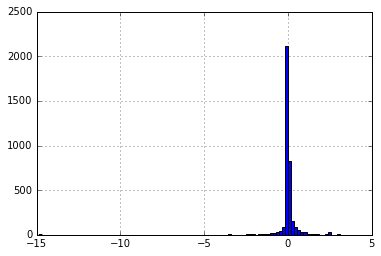

In [272]:
S = capitalDf['对数－基金差值'].replace(-np.inf, np.nan).replace(np.inf, np.nan)
#S = capitalDf['对数－基金差值'].replace(np.inf, np.nan)
S.dropna().hist(bins=100)

* 这个差值可以与当前外部特征的差值结合分析
* 异常值需要特殊对待！？

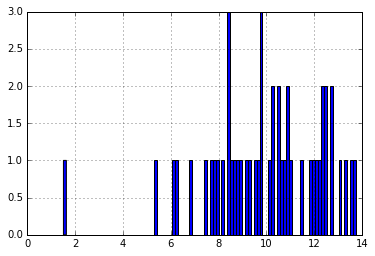

In [261]:
capitalDf['对数－贷款差值'] =np.log(capitalDf['贷款余额'] - capitalDf['贷款余额月日均'])
S = capitalDf['对数－贷款差值'].replace(-np.inf, np.nan)
S.dropna().hist(bins=100)

* 贷款差值可以忽略？用户数量太小。 除非用descion tree

## 用户银行业务特征 

In [280]:
bankDf = masterDf.ix[:, ['贵宾客户等级描述', '账户即时通签约标志', '手机银行签约标志', '三方存管签约标志', '网银签约标志',
       '代发工资签约标志', '信用卡绑定还款签约标志', '按揭贷款标志', '当年购买理财标志', '钱生钱签约标志', '持有定期存款标志',
       '资金归集签约标志', '乐收银签约标志']]
bkdesDf = bankDf.describe().transpose()[['mean', 'std']]
bkdesDf.rename(columns={'mean':'持有百分比', 'std': '持有分布分散度'},inplace=True)
bkdesDf.sort_values(by=['持有百分比'], ascending=False, inplace=True)
bkdesDf


,持有百分比,持有分布分散度
按揭贷款标志,0.979734,0.140914
乐收银签约标志,0.972232,0.164315
资金归集签约标志,0.963349,0.187910
信用卡绑定还款签约标志,0.953001,0.211646
代发工资签约标志,0.920835,0.270008
三方存管签约标志,0.909969,0.286239
当年购买理财标志,0.633581,0.481847
持有定期存款标志,0.375647,0.484310
钱生钱签约标志,0.284840,0.451357
网银签约标志,0.257503,0.437277


In [285]:
bankDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
账户即时通签约标志,11596.0,0.066661,0.249445,0.0,0.0,0.0,0.0,1.0
手机银行签约标志,11596.0,0.169972,0.375625,0.0,0.0,0.0,0.0,1.0
三方存管签约标志,11596.0,0.909969,0.286239,0.0,1.0,1.0,1.0,1.0
网银签约标志,11596.0,0.257503,0.437277,0.0,0.0,0.0,1.0,1.0
代发工资签约标志,11596.0,0.920835,0.270008,0.0,1.0,1.0,1.0,1.0
信用卡绑定还款签约标志,11596.0,0.953001,0.211646,0.0,1.0,1.0,1.0,1.0
按揭贷款标志,11596.0,0.979734,0.140914,0.0,1.0,1.0,1.0,1.0
当年购买理财标志,11596.0,0.633581,0.481847,0.0,0.0,1.0,1.0,1.0
钱生钱签约标志,11596.0,0.284840,0.451357,0.0,0.0,0.0,1.0,1.0
持有定期存款标志,11596.0,0.375647,0.484310,0.0,0.0,0.0,1.0,1.0


## 用户交易情况，数量，频率，渠道


In [281]:
channelDf = masterDf[['近三个月柜面存款次数', '近三个月柜面存款金额', '近三个月柜面取款次数',
       '近三个月柜面取款金额', '近三个月柜面转账次数', '近三个月柜面转账金额', '近三个月ATM存款次数', '近三个月ATM存款金额',
       '近三个月ATM取款次数', '近三个月ATM取款金额', '近三个月网银转账次数', '近三个月网银转账金额',
       '近三个月手机银行转账次数', '近三个月手机银行转账金额', '近三个月手机银行支付交易次数', '近三个月手机银行支付交易金额',
       '近三个月手机银行缴费次数', '近三个月手机银行缴费金额', '近三个月手机银行手机充值次数', '近三个月手机银行手机充值金额',
       '近三个月POS消费次数', '近三个月POS消费金额', '近三个月跨行资金归集交易次数', '近三个月跨行资金归集交易金额',
       '近三个月跨行通交易次数', '近三个月跨行通交易金额', '近三个月交易次数合计', '交易活跃度描述']]
channelDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
近三个月柜面存款次数,11596.0,0.430580,2.522980e+00,0.0,0.0,0.0,0.0000,1.540000e+02
近三个月柜面存款金额,11596.0,21284.133244,2.084811e+05,0.0,0.0,0.0,0.0000,1.184160e+07
近三个月柜面取款次数,11596.0,0.197913,1.176483e+00,0.0,0.0,0.0,0.0000,7.000000e+01
近三个月柜面取款金额,11596.0,7067.335710,6.705398e+04,0.0,0.0,0.0,0.0000,3.230000e+06
近三个月柜面转账次数,11596.0,0.030097,2.799150e-01,0.0,0.0,0.0,0.0000,1.200000e+01
近三个月柜面转账金额,11596.0,18140.670669,6.029866e+05,0.0,0.0,0.0,0.0000,5.296000e+07
近三个月ATM存款次数,11596.0,1.903415,6.321867e+00,0.0,0.0,0.0,1.0000,2.080000e+02
近三个月ATM存款金额,11596.0,11465.789151,4.469645e+04,0.0,0.0,0.0,3200.0000,1.227000e+06
近三个月ATM取款次数,11596.0,1.407209,4.586058e+00,0.0,0.0,0.0,1.0000,1.660000e+02
近三个月ATM取款金额,11596.0,2937.340462,1.098339e+04,0.0,0.0,0.0,700.0000,3.800000e+05


* 可以提取的特征：进账总金额，出账总金额，交易频率（在不同额度区间）
* 验证交易渠道偏好与营销成功率的关系，plot the similarity matrix
* 手机银行手机充值、缴费部分可以删除。

# Content below is draft..

ValueError: Unrecognized marker style vo

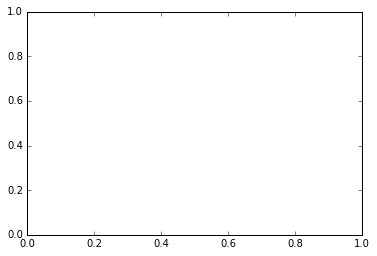

In [233]:
x=[1,2]
y=[4,5]
plt.scatter(x,y, c=['r', 'b'],marker='vo')

In [219]:
?plt.scatter

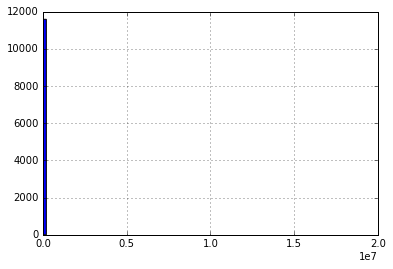

In [184]:
nationalDebtS[col].hist(bins=100)

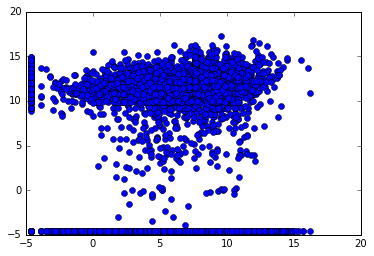

In [153]:
ax = plt.plot(savingsDf['对数－活期余额'], savingsDf['对数－定期余额'], 'bo')

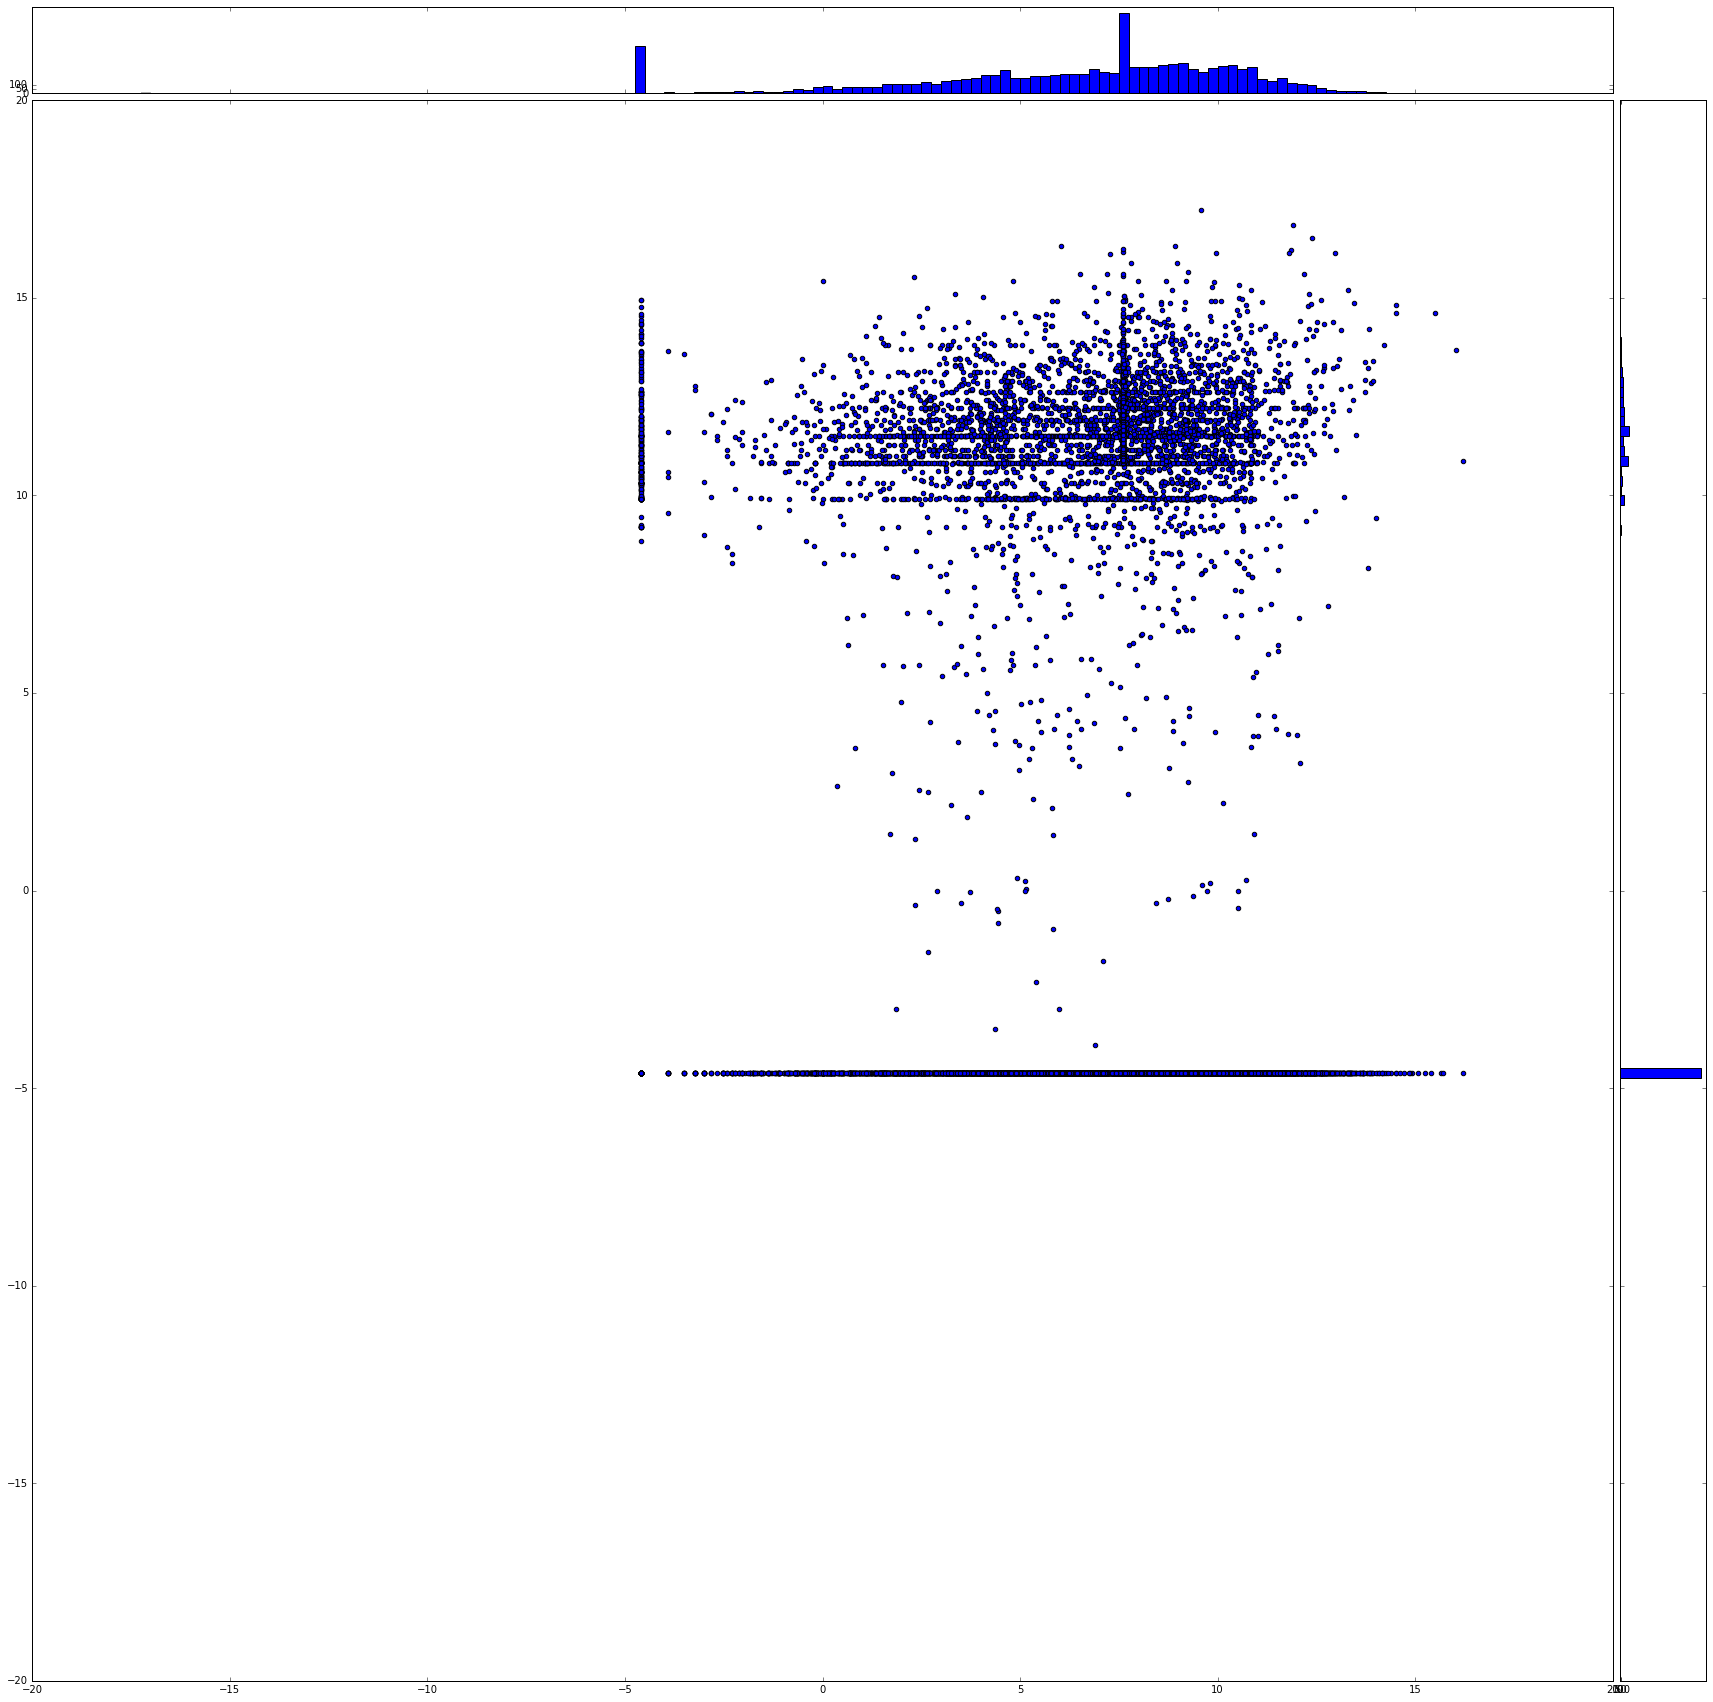

In [158]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
x = savingsDf['对数－活期余额'].values
y = savingsDf['对数－定期余额']


fig, axScatter = plt.subplots(figsize=(30, 30))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

plt.draw()
plt.show()

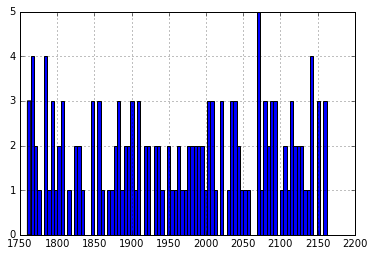

In [117]:
barS2 = savingsDf.ix[(savingsDf['存款余额']>=barS.min())&
                     (savingsDf['存款余额']<=barS.max()), '存款余额']
barS2.hist(bins=90)

In [92]:
division

array([ -4.60517019,  -4.3969381 ,  -4.18870601,  -3.98047392,
        -3.77224183,  -3.56400974,  -3.35577766,  -3.14754557,
        -2.93931348,  -2.73108139,  -2.5228493 ,  -2.31461721,
        -2.10638513,  -1.89815304,  -1.68992095,  -1.48168886,
        -1.27345677,  -1.06522468,  -0.8569926 ,  -0.64876051,
        -0.44052842,  -0.23229633,  -0.02406424,   0.18416785,
         0.39239993,   0.60063202,   0.80886411,   1.0170962 ,
         1.22532829,   1.43356037,   1.64179246,   1.85002455,
         2.05825664,   2.26648873,   2.47472082,   2.6829529 ,
         2.89118499,   3.09941708,   3.30764917,   3.51588126,
         3.72411335,   3.93234543,   4.14057752,   4.34880961,
         4.5570417 ,   4.76527379,   4.97350588,   5.18173796,
         5.38997005,   5.59820214,   5.80643423,   6.01466632,
         6.22289841,   6.43113049,   6.63936258,   6.84759467,
         7.05582676,   7.26405885,   7.47229094,   7.68052302,
         7.88875511,   8.0969872 ,   8.30521929,   8.51

In [91]:
?np.histogram

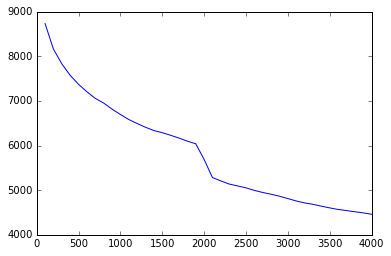

In [248]:
col = '活期余额'
dfbalence = dfuinfo.ix[dfuinfo[col]> 0,  [col]].copy()
      # '活期余额', '定期余额',
      # '理财余额', '金融资产余额', '国债余额', '基金市值']].copy()
dfbalence['总资产'] = dfbalence.sum(axis=1)
dfbalence['log'] = np.log(dfbalence['总资产'])
Stotal = dfbalence['总资产']
median = Stotal.median()
maxN = 1*Stotal.max()/median
gammas = np.arange(.05, maxN, .05)
bal = [i*median for i in gammas]
y=[]
ilb = 0
iup = ilb+ 40

for b in bal[ilb:iup]:
    popCount = (Stotal > b).sum()
    y.append(popCount)
    
    #print((Stotal <= gamma*median).sum())
    #Stotal.ix[(Stotal > gamma*median)&(Stotal < .25e8)].hist(bins=50)
ax = plt.plot(bal[ilb:iup], y)

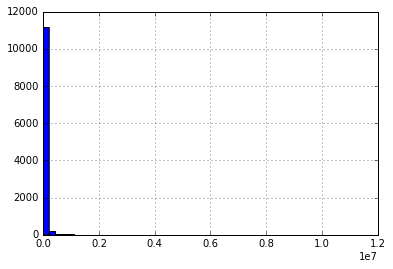

In [252]:
dfbalence['总资产'].hist(bins=50)

In [253]:
dfbalence['总资产'].describe()

count    1.146200e+04
mean     3.428417e+04
std      2.400139e+05
min      1.000000e-02
25%      1.102475e+02
50%      2.000000e+03
75%      1.349330e+04
max      1.105108e+07
Name: 总资产, dtype: float64

In [176]:
(dfuinfo[['理财余额']] >0).sum()

理财余额    3612
dtype: int64

TypeError: inner() got multiple values for argument 'ax'

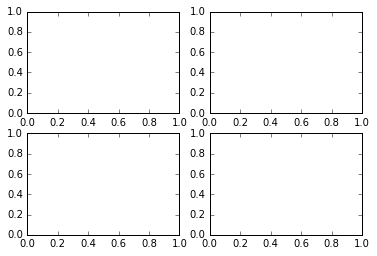

In [186]:
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.plot(gammas, y, ax=axs[(1,1)])


In [190]:
?fig.add_axes

* 描述用户

********************
统计日期

Number of zeros:
********************
核心客户号

Number of zeros:
0
Mean:
1403470089.6242707
Std:
149863848.52520996
********************
一级分行机构号

Number of zeros:
********************
客户姓名

Number of zeros:
********************
年龄

Number of zeros:
0
Mean:
51.19761626937823
Std:
15.11540019812779
********************
年龄分段代码

Number of zeros:
********************
性别描述

Number of zeros:
********************
首次开户日期

Number of zeros:
********************
首次开户机构号

Number of zeros:
********************
手机号码

Number of zeros:
********************
固定电话

Number of zeros:
********************
联系地址

Number of zeros:
********************
电子邮箱

Number of zeros:
********************
贵宾客户等级描述

Number of zeros:
********************
账户即时通签约标志

Number of zeros:
11213
Mean:
0.06542757126187698
Std:
0.24728910413094182
********************
手机银行签约标志

Number of zeros:
9983
Mean:
0.16794465744290715
Std:
0.37383271302647053
********************
三方存管签约标志

Number of zeros:
1086
Mean:
0.

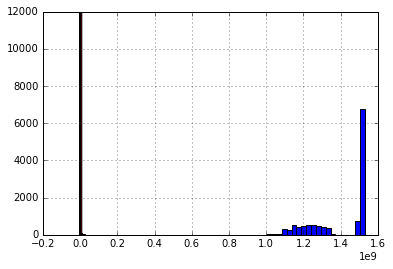

In [49]:
num= 0
for col in dfuinfo.columns:
    print('*'*20)
    print(col)
    print()
    try:
        print('Number of zeros:')
        print(dfuinfo.ix[dfuinfo[col]<= 0, col].shape[0])
    
        num+=1
        print('Mean:')
        print(dfuinfo[col].mean())
        print('Std:')
        print(dfuinfo[col].std())
        dfuinfo[col].hist(bins=20)
    except Exception as e:
        pass

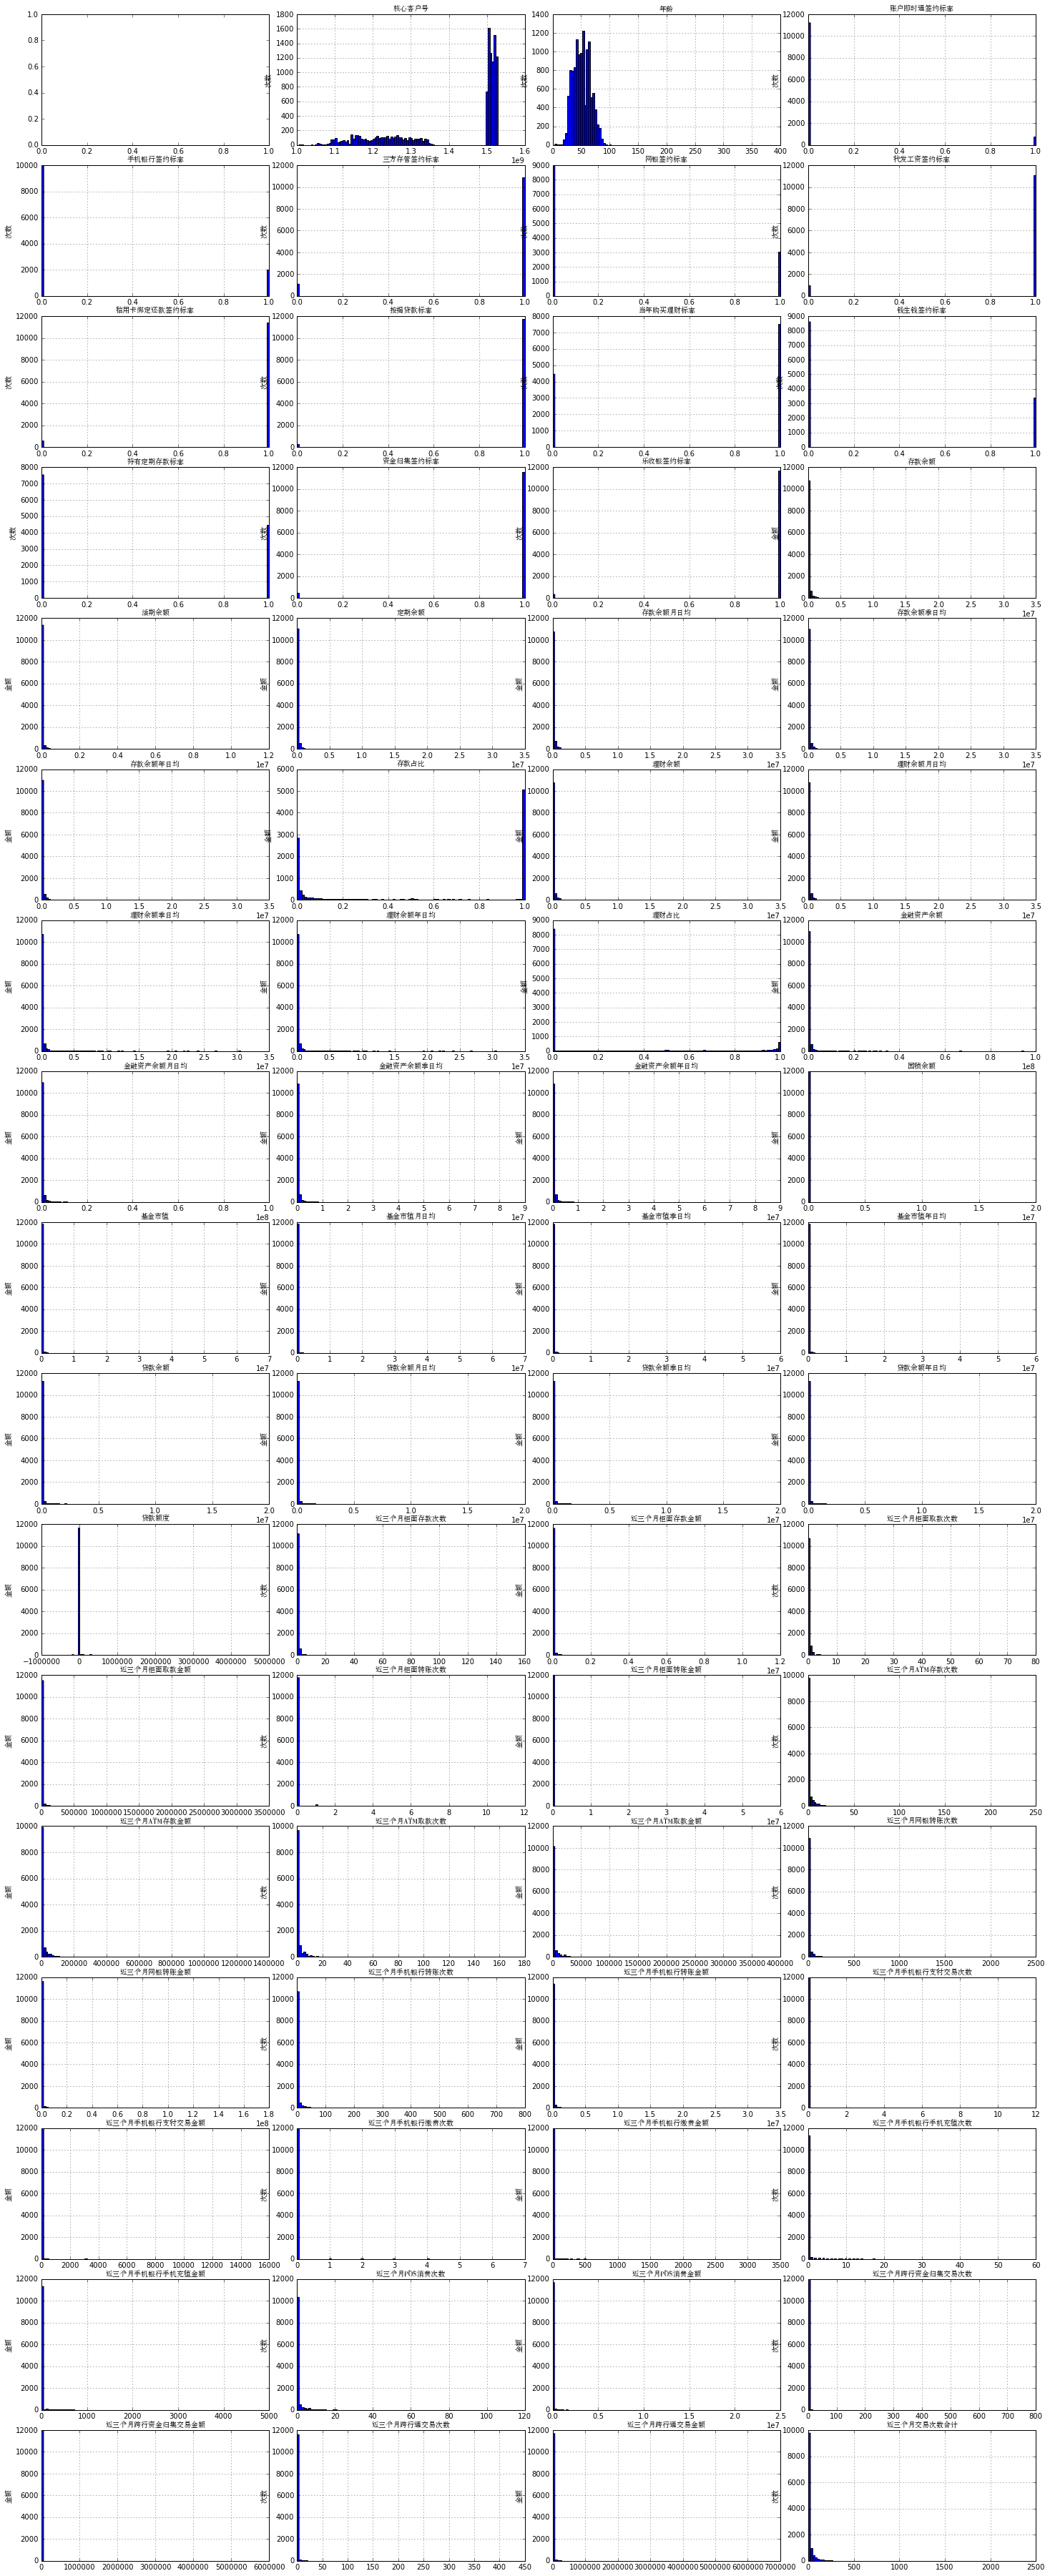

In [124]:
font = matplotlib.font_manager.FontProperties(fname='config/chineseFont.ttf')
#there are 67 numeric type columns
ncols = 4
nrows = int(67/ncols)+1
fig, ax = plt.subplots(nrows= nrows, ncols= ncols, figsize=(20, 50))
fig.tight_layout()
i = 0
for col in dfuinfo.columns:
    Stype = dfuinfo[col].dtype
    if Stype not in (int, float):
        pass
    else:
        i +=1
        ix = np.unravel_index(i, ax.shape)
        #dfuinfo[col].plot(kind='box', ax= ax[ix])
        dfuinfo[col].hist(bins=100, ax= ax[ix])
        ax[ix].set_title(col, fontproperties=font)
        ax[ix].set_xlabel('')
        if Stype == np.int:
            ax[ix].set_ylabel('次数', fontproperties=font)
        else:
            ax[ix].set_ylabel('金额', fontproperties=font)
            
        
    

In [117]:
!ls config

chineseFont.ttf           jusha-data-dir-struct.txt
config.ini                mappingTable.csv


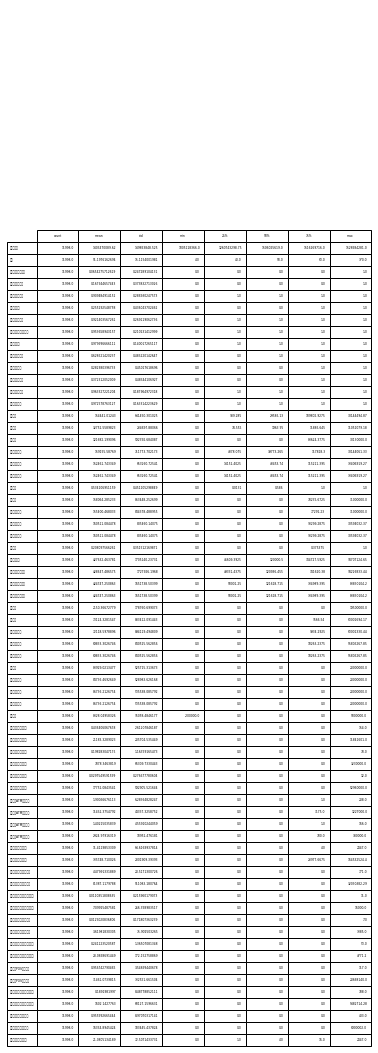

In [126]:
dfdescribe = dfuinfo.describe().transpose()


from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, dfdescribe)  # where df is your data frame

plt.savefig('dataexplore/客户信息基本统计.png')


In [108]:
dd = dfuinfo.describe()

In [109]:
?dd.round

In [78]:
for col in dfuinfo.columns:
    print(col)
    tp = dfuinfo[col].dtype
    print(dfuinfo[col].dtype)
    print(tp in (int, float))
    print()

统计日期
object
False

核心客户号
int64
True

一级分行机构号
object
False

客户姓名
object
False

年龄
int64
True

年龄分段代码
object
False

性别描述
object
False

首次开户日期
object
False

首次开户机构号
object
False

手机号码
object
False

固定电话
object
False

联系地址
object
False

电子邮箱
object
False

贵宾客户等级描述
object
False

账户即时通签约标志
int64
True

手机银行签约标志
int64
True

三方存管签约标志
int64
True

网银签约标志
int64
True

代发工资签约标志
int64
True

信用卡绑定还款签约标志
int64
True

按揭贷款标志
int64
True

当年购买理财标志
int64
True

钱生钱签约标志
int64
True

持有定期存款标志
int64
True

资金归集签约标志
int64
True

乐收银签约标志
int64
True

存款余额
float64
True

活期余额
float64
True

定期余额
float64
True

存款余额月日均
float64
True

存款余额季日均
float64
True

存款余额年日均
float64
True

存款占比
float64
True

客户存款类型说明
object
False

理财余额
float64
True

理财余额月日均
float64
True

理财余额季日均
float64
True

理财余额年日均
float64
True

理财占比
float64
True

客户理财类型说明
object
False

金融资产余额
float64
True

金融资产余额月日均
float64
True

金融资产余额季日均
float64
True

金融资产余额年日均
float64
True

国债余额
float64
True

基金市值
float64
True

基金市值月日均
float64
True

基金市值季日均
float64
True

基金市值年日均


True

In [40]:
s= dfuinfo['金融资产余额']

In [29]:
dfuinfo['存款余额'].describe()

count    1.199800e+04
mean     1.544410e+05
std      6.414503e+05
min      0.000000e+00
25%      9.892850e+02
50%      2.958513e+04
75%      1.098029e+05
max      3.014449e+07
Name: 存款余额, dtype: float64

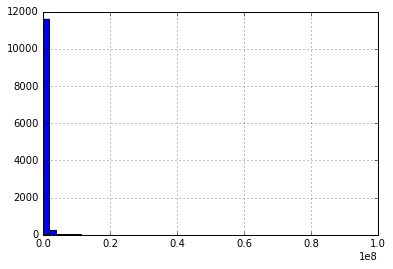

In [47]:
s.hist(bins=50)

In [20]:
dfasset = dfBuilder(['金融资产'])

data/tempdir/rawdata
<<<0.00>>>
['金融资产']
Shape: (69481, 6)
Columns: Index(['核心客户号', '金融资产余额', '金融资产代码', '金融资产余额季日均', '金融资产余额年日均', '金融资产描述'], dtype='object')
核心客户号        0
金融资产余额       0
金融资产代码       0
金融资产余额季日均    0
金融资产余额年日均    0
金融资产描述       0
dtype: int64


In [22]:
dfcontract = dfBuilder(['产品签约'])

data/tempdir/rawdata
<<<0.00>>>
['产品签约']
Shape: (130442, 6)
Columns: Index(['核心客户号', '签约日期', '当前签约日期', '零售签约产品代码', '零售签约产品描述', '签约口径说明'], dtype='object')
核心客户号         0
签约日期        116
当前签约日期      116
零售签约产品代码    116
零售签约产品描述    116
签约口径说明      116
dtype: int64


In [32]:
dfcontract['签约口径说明'].drop_duplicates()

0                               客户的tss理财余额>0 则认为客户是tss理财客户
18       借记卡折一本通（卡bin622619）且CO_SIGN_NUM in ('0057','00...
1589     T03_AGENT_FUND_DTL_ACCT.PROD_ID IN (690010,690...
1651                    借记卡折一本通（卡bin622622 622616 621691) 
2707                                     产品编号FSFA开头 且余额大于0
2837                                     产品编号FSAC开头 且余额大于0
3263                                 INSUR_CATE_CODE = '4'
3280                                 INSUR_CATE_CODE = '1'
3449                                     发行期限为2，3，4年，且余额>0
4243                                存款协议级汇总表（存款期限一年定期)余额>0
4339                                 基金产品属性代码在(3,5)中，且市值>0
4469                            存款协议级汇总表（存款期限在3月及以下定期）余额>0
4531                   信用卡表卡状态'01'，结束日期大于20140430，卡级别为'40'
4565          T03_INTER_MBANK_SERV_CONTR 客户为有效，则认为是客户为签约客户
4577                                 产品包括三年、四年、五年定期存款 余额>0
4660                                存款协议级汇总表（存款期限两年定期)余额>0
4840                                 二级担保方式，C006、C007 且未

In [23]:
dfdeal = dfBuilder(['产品交易'])

data/tempdir/rawdata
<<<0.00>>>
['产品交易']
Shape: (12000, 386)
Columns: Index(['khdm', '统计日期', '核心客户号', 'CUST_NAME', '定存开户次数', '定存开户金额', '定存开户单笔最大金额',
       '定存开户单笔最小金额', '定存提前支取次数', '定存提前支取金额',
       ...
       '网银卖出外汇次数', '网银卖出外汇金额', '手机银行买入外汇次数', '手机银行买入外汇金额', '手机银行卖出外汇次数',
       '手机银行卖出外汇金额', '电话银行买入外汇次数', '电话银行买入外汇金额', '电话银行卖出外汇次数', '电话银行卖出外汇金额'],
      dtype='object', length=386)
khdm                  0
统计日期               3158
核心客户号              3158
CUST_NAME          3158
定存开户次数             3158
定存开户金额             3158
定存开户单笔最大金额         3158
定存开户单笔最小金额         3158
定存提前支取次数           3158
定存提前支取金额           3158
定存提前支取单笔最大金额       3158
定存提前支取单笔最小金额       3158
定存到期次数             3158
定存到期金额             3158
定存到期单笔最大金额         3158
定存到期单笔最小金额         3158
一年期定存开户次数          3158
一年期定存开户金额          3158
一年期定存开户单笔最大金额      3158
一年期定存开户单笔最小金额      3158
一年期定存提前支取次数        3158
一年期定存提前支取金额        3158
一年期定存提前支取单笔最大金额    3158
一年期定存提前支取单笔最小金额    3158
一年期定存到期次数          3158
一年期定存到期金额 

In [28]:
dfdeal['统计日期'].drop_duplicates()

0    2016/2/29
1          NaN
Name: 统计日期, dtype: object

In [30]:
import pandas as pd
df = pd.read_csv('data/tempdir/cleaned.csv')
df.head()

,jgmc,统计日期,QQ号,电子邮件,证件号码,通讯地址,姓名,性别,年龄,民族,...,高端小区客户标记,潜在高端客户标记,客户贡献度,客户活跃度,客户渠道偏好,客户金融资产偏好,核心客户号,金融资产代码_107,金融资产代码_130,金融资产代码_170
0,锦江支行,2016/2/29,NaN,qiangweihuaer@hotmail.com,NaN,成都市成华区双林路44号13幢1单元11号,陈华,女,39,NaN,...,NaN,NaN,较高贡献,高活跃,渠道均衡型,资产均衡型,1156224749,0.0,0.0,0.0
1,九眼桥支行,2016/2/29,13874305,13874305@qq.com,NaN,成都市武侯区碧云路１号３栋５单元８号,何秀琴,女,43,NaN,...,NaN,潜在高端客户,较高贡献,高活跃,手机银行偏好型,资产均衡型,1507158773,0.0,0.0,0.0
2,骡马市支行,2016/2/29,42460595,42460595@qq.com,NaN,中国成都市青羊区蛟龙工业港高新区13座,杨春艳,女,36,NaN,...,NaN,NaN,低贡献,中活跃,渠道均衡型,理财偏好型,1338742696,0.0,0.0,0.0
3,营业部,2016/2/29,NaN,1@123.com,NaN,成都市成化区建设北路二段,王蔚然,女,78,NaN,...,NaN,潜在高端客户,高贡献,较高活跃,POS交易偏好型,资产均衡型,1178062318,0.0,0.0,0.0
4,金牛支行,2016/2/29,NaN,NaN,NaN,中国四川省金鹏街,华明英,女,37,NaN,...,NaN,NaN,中贡献,低活跃,手机银行偏好型,贷款偏好型,1519566462,0.0,0.0,0.0


In [27]:
"""
/mainClean.py

when called from command line $JUSHAPATH/$: python mainClean.py AbsDatadir
This script do the following stuff:

1.
"""
import sys

from __init__ import confUser
from preporcess import Cleaner, CleanerAnny
from tools import progressPrinter
import pandas as pd
import os

#inputDir = sys.argv[1]
#confUser['DATADIR'] = sys.argv[1]





if __name__=='__main__':

	print(confUser['DATADIR'])

	confUser['DATADIR'] = argv[1]

	maptableDir = 'config/mappingTable.csv'
	usefulCols = ['性别', '年龄', '婚姻', '学历', '从属行业',
	'理财抗风险等级', '客户层级', '新老客户标记', '五级分类', '小微客户类型', '消费类资产产品', '纯消费性微贷标记',
	'纯质押贷款标记', '非储投资偏好', '高金融资产标记', '购买大额他行理财标记', '大额消费标记', '信用卡高还款标记',
	'信用卡高端消费标记', '优质行业标记', '高代发额客户标记','潜在高端客户标记', '客户贡献度',
	'客户活跃度', '客户渠道偏好', '客户金融资产偏好']

	
	cleaner = Cleaner(confUser)
	
	cleaner.startCleaning(maptableDir, usefulCols)

	cleannerAnny = CleanerAnny(confUser, ['金融资产'], v=False)
	cleaner.saveNlog()

	dfYall = cleannerAnny.startCleaning(intresedCode= [107, 130, 170])
	#dfYall.rename(columns={'核心客户号':'jgmc'},inplace=True)

	dfYallcsv = os.path.join(confUser['DATADIR'], 'dfYall.csv')
	dfYall.to_csv(dfYallcsv, index=False)
    
    #cleaner.cleanedDf['核心客户号'] = cleaner.cleanedDf.index
	cleaner.cleanedDf['核心客户号'] = cleaner.cleanedDf.index.values
    cleanedDf = pd.merge(cleaner.cleanedDf, dfYall, on='核心客户号')
	fnc = os.path.join(confUser['DATADIR'], 'cleaned.csv')
	cleanedDf.to_csv(fnc, index=False)
	



IndentationError: unindent does not match any outer indentation level (<ipython-input-27-8eea97626db6>, line 53)

In [29]:
cleaner.cleanedDf.index.values

array([1156224749, 1507158773, 1338742696, ..., 1510873791, 1234289690,
       1525530057])

In [2]:
from preporcess import CleanerAnny
from __init__ import confUser

In [6]:
confUser['DATADIR'] = 'data/tempdir/'
cleannerAnny = CleanerAnny(confUser, ['金融资产'], v=False)
dfYall = cleannerAnny.startCleaning(intresedCode= [107, 130, 170])

data/tempdir/rawdata
11596
(69481, 6)


/Users/xl-macbook/anaconda/lib/python2.7/site-packages/pandas/core/common.py:452: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x
/Users/xl-macbook/anaconda/lib/python2.7/site-packages/pandas/core/common.py:464: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask |= arr == x


KeyError: '\xe9\x87\x91\xe8\x9e\x8d\xe8\xb5\x84\xe4\xba\xa7\xe4\xbb\xa3\xe7\xa0\x81'